How to run the file:

Install Jupyter:
Run pip install notebook if Jupyter is not installed.

Start Jupyter:
In your terminal, run jupyter notebook.

Open File:
In your browser, navigate to the file ml_project1.ipynb.

Run Cells:
Open the notebook and run each cell with Shift + Enter or the "Run" button.

In [1]:
import pandas as pd

file_paths = {
    'players_15': 'data/players_15.csv',
    'players_16': 'data/players_16.csv',
    'players_17': 'data/players_17.csv',
    'players_18': 'data/players_18.csv',
    'players_19': 'data/players_19.csv',
    'players_20': 'data/players_20.csv',
    'players_21': 'data/players_21.csv'
}

dataframes = {key: pd.read_csv(path) for key, path in file_paths.items()}

combined_data = pd.concat(dataframes.values(), ignore_index=True)

selected_columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'player_positions']
filtered_combined_data = combined_data[selected_columns]

filtered_combined_data = filtered_combined_data[filtered_combined_data['player_positions'] != 'GK']

filtered_combined_data.to_csv('combined_fifa_player_stats.csv', index=False)

print("Combined dataset saved successfully")

Combined dataset saved successfully


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def pos_trans(row):
    positions = row.split(', ')
    for pos in positions:
        if pos in ['ST', 'CF']:
            return 'ST'
        if pos in ['LW', 'RW', 'LM', 'RM']:
            return 'WF'
        if pos in ['CAM', 'CDM', 'CM']:
            return 'MF'
        if pos in ['LWB', 'RWB', 'LB', 'RB']:
            return 'WB'
        if pos in ['CB']:
            return 'CB'

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)

    data['general_position'] = data['player_positions'].apply(pos_trans)
    data = data[data['general_position'] != 'Unknown']  

    X = data[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
    y = data['general_position']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test


/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_7528/944346139.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Player Count', data=position_counts, palette='magma')


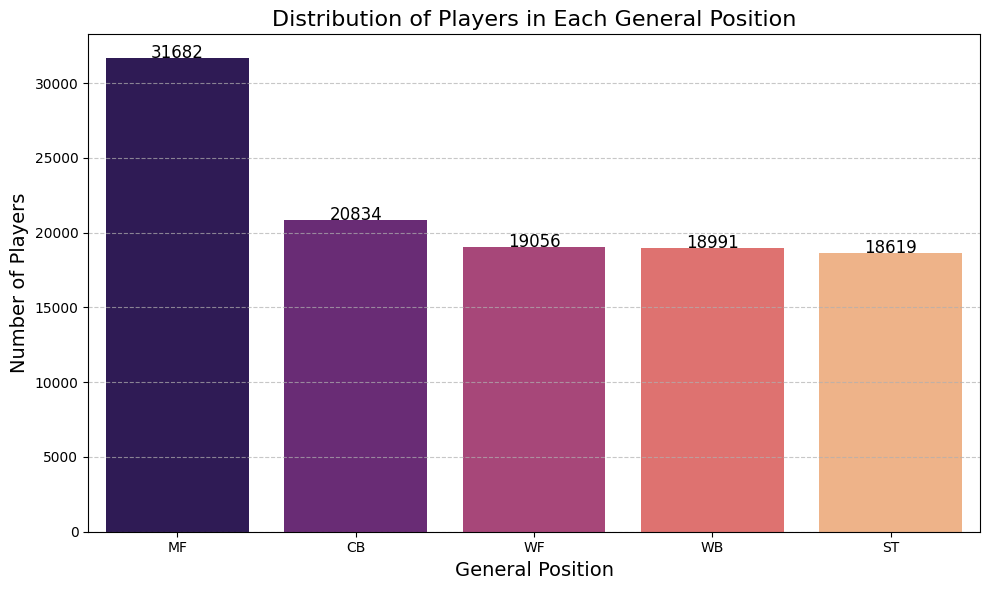

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_7528/944346139.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='general_position', y='defending', data=data, palette="magma")


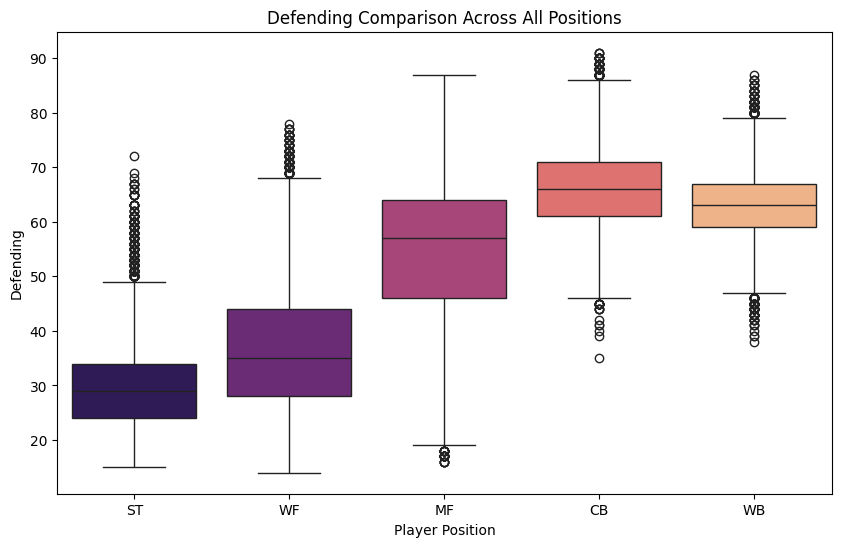

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_7528/944346139.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='general_position', y='shooting', data=data, palette="magma")


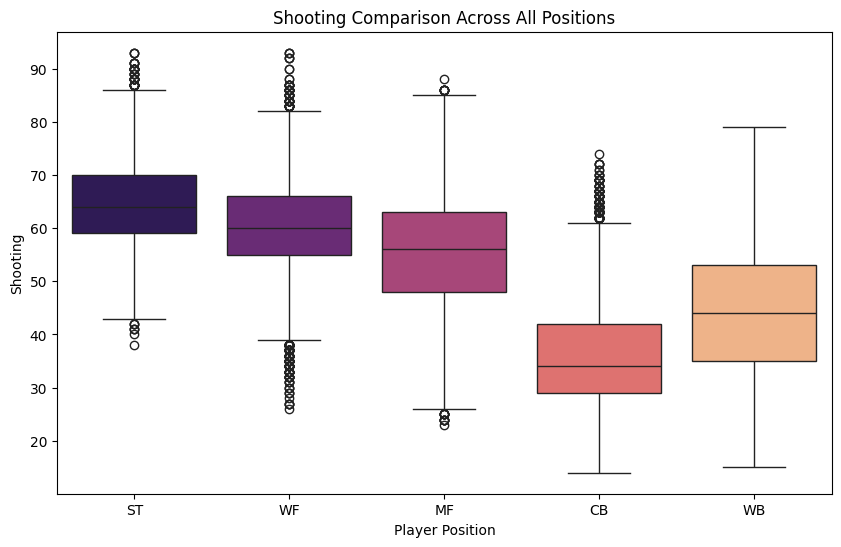

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_7528/944346139.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='general_position', y='passing', data=data, palette="magma")


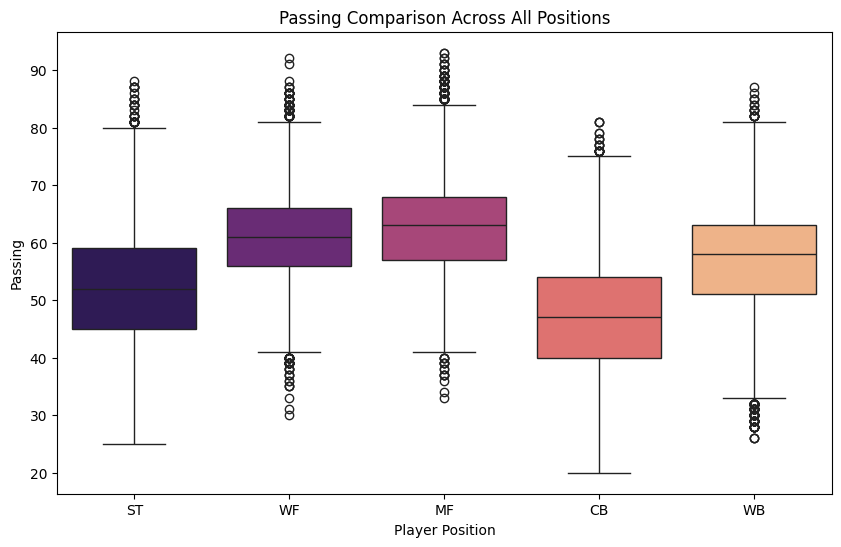

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_7528/944346139.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='general_position', y='dribbling', data=data, palette="magma")


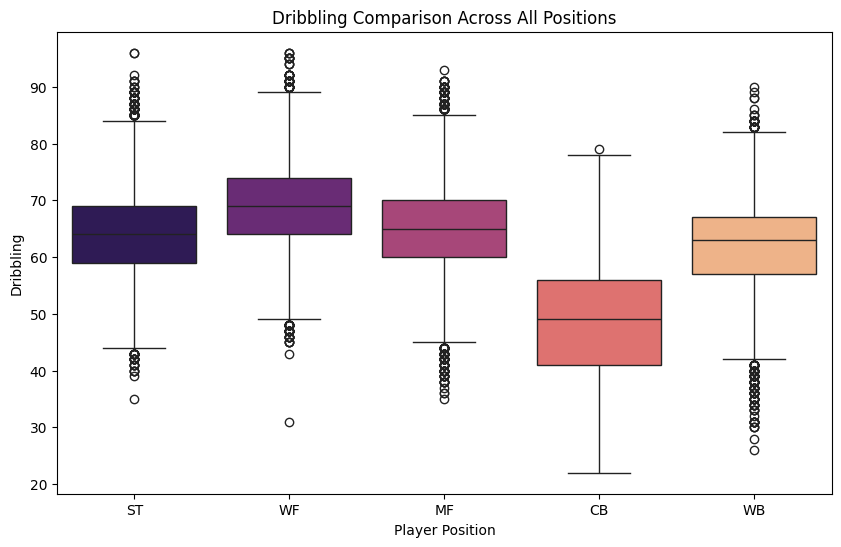

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_7528/944346139.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='general_position', y='pace', data=data, palette="magma")


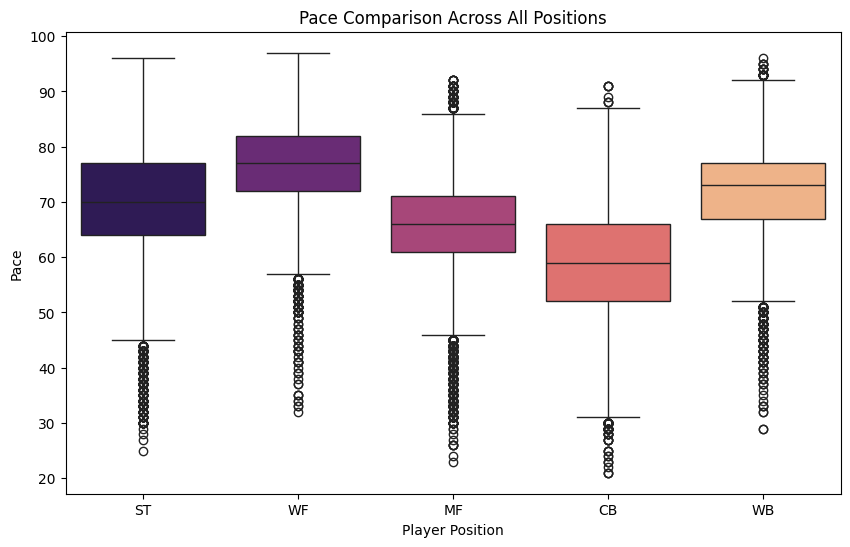

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_7528/944346139.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='general_position', y='physic', data=data, palette="magma")


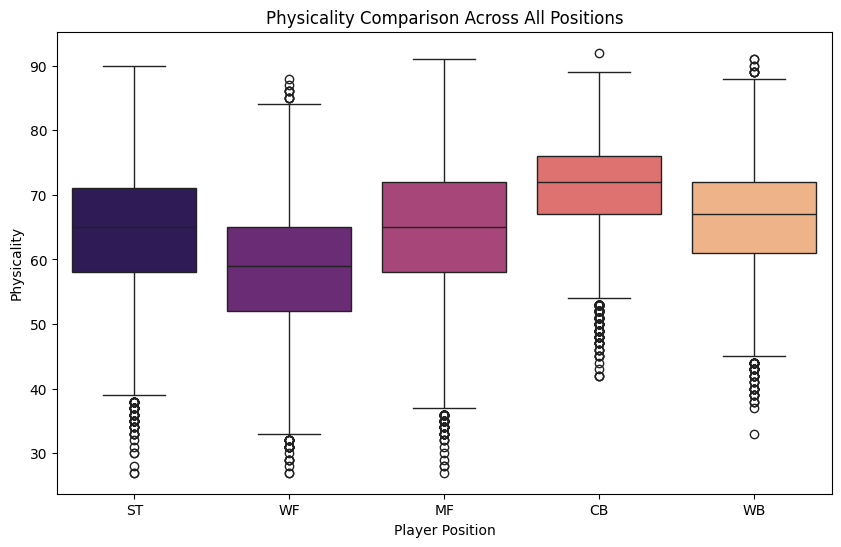

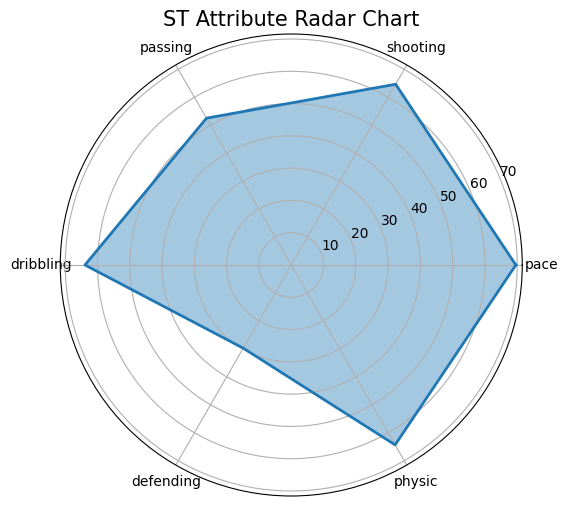

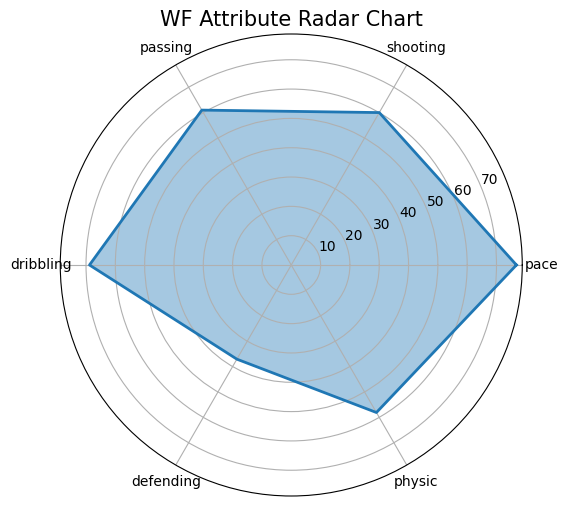

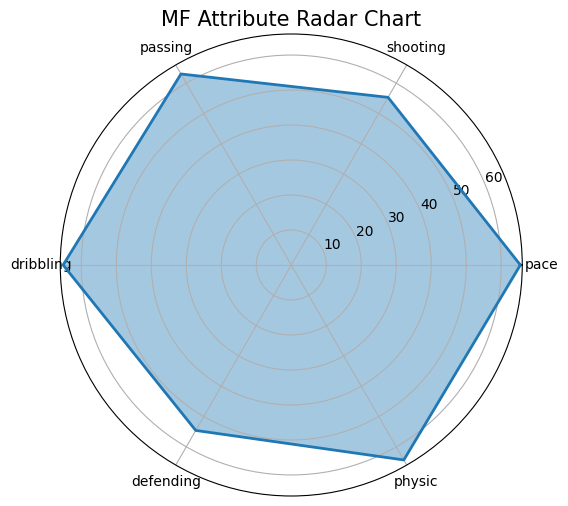

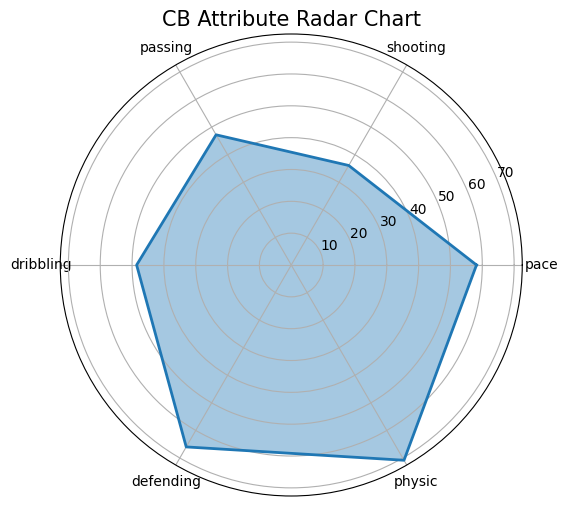

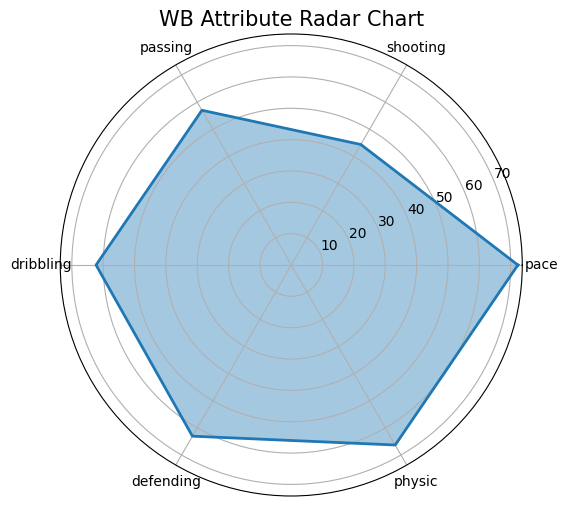

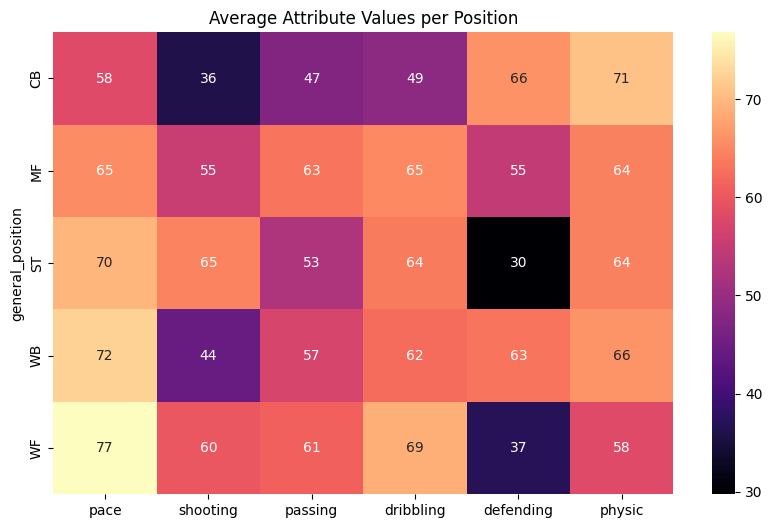

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import pi

data = pd.read_csv('combined_fifa_player_stats.csv')
data['general_position'] = data['player_positions'].apply(pos_trans)

# Plot Players in Different General Positions
position_counts = data['general_position'].value_counts().reset_index()
position_counts.columns = ['Position', 'Player Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Player Count', data=position_counts, palette='magma')
plt.title('Distribution of Players in Each General Position', fontsize=16)
plt.xlabel('General Position', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(position_counts['Player Count']):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


# Defending Comparison Across All Positions 
plt.figure(figsize=(10, 6))
sns.boxplot(x='general_position', y='defending', data=data, palette="magma")
plt.title('Defending Comparison Across All Positions')
plt.xlabel('Player Position')
plt.ylabel('Defending')
plt.show()

# Shooting Ability Across All Positions 
plt.figure(figsize=(10, 6))
sns.boxplot(x='general_position', y='shooting', data=data, palette="magma")
plt.title('Shooting Comparison Across All Positions')
plt.xlabel('Player Position')
plt.ylabel('Shooting')
plt.show()

# Passing Ability Across All Positions 
plt.figure(figsize=(10, 6))
sns.boxplot(x='general_position', y='passing', data=data, palette="magma")
plt.title('Passing Comparison Across All Positions')
plt.xlabel('Player Position')
plt.ylabel('Passing')
plt.show()

# Dribbling Ability Across All Positions 
plt.figure(figsize=(10, 6))
sns.boxplot(x='general_position', y='dribbling', data=data, palette="magma")
plt.title('Dribbling Comparison Across All Positions')
plt.xlabel('Player Position')
plt.ylabel('Dribbling')
plt.show()

# Pace Comparison Across All Positions 
plt.figure(figsize=(10, 6))
sns.boxplot(x='general_position', y='pace', data=data, palette="magma")
plt.title('Pace Comparison Across All Positions')
plt.xlabel('Player Position')
plt.ylabel('Pace')
plt.show()

# Physicality Comparison Across All Positions 
plt.figure(figsize=(10, 6))
sns.boxplot(x='general_position', y='physic', data=data, palette="magma")
plt.title('Physicality Comparison Across All Positions')
plt.xlabel('Player Position')
plt.ylabel('Physicality')
plt.show()


def plot_radar_chart(attribute_means, categories, position_name):
    N = len(categories)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    attribute_means += attribute_means[:1]
    
    plt.figure(figsize=(6, 6))
    my_plot = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    
    my_plot.plot(angles, attribute_means, linewidth=2, linestyle='solid', label=position_name)
    my_plot.fill(angles, attribute_means, alpha=0.4)
    
    plt.title(f'{position_name} Attribute Radar Chart', size=15)
    plt.show()

attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
categories = attributes

positions = data['general_position'].unique()

for position in positions:
    attribute_means = data[data['general_position'] == position][attributes].mean().tolist()
    plot_radar_chart(attribute_means, categories, position)

plt.figure(figsize=(10, 6))
mean_values = data.groupby('general_position')[attributes].mean().reset_index()
sns.heatmap(mean_values.set_index('general_position'), annot=True, cmap="magma")
plt.title('Average Attribute Values per Position')
plt.show()



In [4]:
import os
from sklearn.metrics import classification_report, accuracy_score

def evaluate_best_model(best_model, X_test_scaled, y_test):
    y_test_pred = best_model.predict(X_test_scaled)
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification_rep = classification_report(y_test, y_test_pred)
    
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Test Classification Report:")
    print(classification_rep)
    
    return test_accuracy, classification_rep

In [5]:
# KNN

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import os
import csv
from sklearn.metrics import classification_report, accuracy_score

def write_knn_classification_reports(file_name, model_class, grid_search, X_train_scaled, X_test_scaled, y_train, y_test):
    os.makedirs('classification_reports', exist_ok=True)

    report_file_path = f'classification_reports/{file_name}'
    
    with open(report_file_path, 'w', newline='') as csvfile:
        fieldnames = ['Combination', 'n_neighbors', 'weights', 'metric', 'Test Accuracy'] + \
                     ['Class', 'Precision', 'Recall', 'F1-score', 'Support']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for i, params in enumerate(grid_search.cv_results_['params']):
            model = model_class(**params)
            model.fit(X_train_scaled, y_train)
            
            y_test_pred = model.predict(X_test_scaled)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            report_dict = classification_report(y_test, y_test_pred, output_dict=True)

            for class_label, metrics in report_dict.items():
                if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
                    row = {
                        'Combination': i + 1,
                        'n_neighbors': params.get('n_neighbors', ''),
                        'weights': params.get('weights', ''),
                        'metric': params.get('metric', ''),
                        'Test Accuracy': test_accuracy,
                        'Class': class_label,
                        'Precision': metrics['precision'],
                        'Recall': metrics['recall'],
                        'F1-score': metrics['f1-score'],
                        'Support': metrics['support']
                    }
                    writer.writerow(row)

    print(f"Classification reports saved to {report_file_path}")


def train_knn_model(file_path):
    X_train_scaled, X_test_scaled, y_train, y_test = load_and_preprocess_data(file_path)

    knn = KNeighborsClassifier()

    param_grid = {
        'n_neighbors': range(1, 31),  
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)
    grid_search.fit(X_train_scaled, y_train)

    write_knn_classification_reports('knn_classification_report_all.csv', KNeighborsClassifier, grid_search, X_train_scaled, X_test_scaled, y_train, y_test)

    best_knn = grid_search.best_estimator_
    print(f"Best KNN Parameters: {grid_search.best_params_}")

    test_accuracy, classification_rep = evaluate_best_model(best_knn, X_test_scaled, y_test)

    return best_knn, grid_search.best_params_, test_accuracy


In [6]:
# SVM

from sklearn.svm import SVC

def write_svm_classification_reports(file_name, model_class, grid_search, X_train_scaled, X_val_scaled, y_train, y_val):
    os.makedirs('classification_reports', exist_ok=True)

    report_file_path = f'classification_reports/{file_name}'
    
    with open(report_file_path, 'w', newline='') as csvfile:
        fieldnames = ['Combination', 'C', 'kernel', 'gamma', 'Validation Accuracy'] + \
                     ['Class', 'Precision', 'Recall', 'F1-score', 'Support']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for i, params in enumerate(grid_search.cv_results_['params']):
            model = model_class(**params)
            model.fit(X_train_scaled, y_train)
            
            y_val_pred = model.predict(X_val_scaled)
            val_accuracy = accuracy_score(y_val, y_val_pred)
            report_dict = classification_report(y_val, y_val_pred, output_dict=True)

            for class_label, metrics in report_dict.items():
                if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
                    row = {
                        'Combination': i + 1,
                        'C': params.get('C', ''),
                        'kernel': params.get('kernel', ''),
                        'gamma': params.get('gamma', ''),
                        'Validation Accuracy': val_accuracy,
                        'Class': class_label,
                        'Precision': metrics['precision'],
                        'Recall': metrics['recall'],
                        'F1-score': metrics['f1-score'],
                        'Support': metrics['support']
                    }
                    writer.writerow(row)

    print(f"Classification reports saved to {report_file_path}")

def train_svm_model(file_path):
    X_train_scaled, X_test_scaled, y_train, y_test = load_and_preprocess_data(file_path)

    svm = SVC()

    param_grid = {
        'C': [0.1, 1, 10],  
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale']  
    }

    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    write_svm_classification_reports('svm_classification_report_all.csv', SVC, grid_search, X_train_scaled, X_test_scaled, y_train, y_test)

    best_svm = grid_search.best_estimator_
    print(f"Best SVM Parameters: {grid_search.best_params_}")

    test_acc, classification_rep = evaluate_best_model(best_svm, X_test_scaled, y_test)

    return best_svm, grid_search.best_params_, test_acc

In [7]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

def write_decision_tree_classification_reports(file_name, model_class, grid_search, X_train_scaled, X_test_scaled, y_train, y_test):
    os.makedirs('classification_reports', exist_ok=True)

    report_file_path = f'classification_reports/{file_name}'
    
    with open(report_file_path, 'w', newline='') as csvfile:
        fieldnames = ['Combination', 'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'class_weight', 'Test Accuracy'] + \
                     ['Class', 'Precision', 'Recall', 'F1-score', 'Support']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for i, params in enumerate(grid_search.cv_results_['params']):
            model = model_class(**params)
            model.fit(X_train_scaled, y_train)
            
            y_test_pred = model.predict(X_test_scaled)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            report_dict = classification_report(y_test, y_test_pred, output_dict=True)

            for class_label, metrics in report_dict.items():
                if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
                    row = {
                        'Combination': i + 1,
                        'criterion': params.get('criterion', ''),
                        'max_depth': params.get('max_depth', ''),
                        'min_samples_split': params.get('min_samples_split', ''),
                        'min_samples_leaf': params.get('min_samples_leaf', ''),
                        'class_weight': params.get('class_weight', ''),
                        'Test Accuracy': test_accuracy,
                        'Class': class_label,
                        'Precision': metrics['precision'],
                        'Recall': metrics['recall'],
                        'F1-score': metrics['f1-score'],
                        'Support': metrics['support']
                    }
                    writer.writerow(row)

    print(f"Classification reports saved to {report_file_path}")

def train_decision_tree_model(file_path):
    X_train_scaled, X_test_scaled, y_train, y_test = load_and_preprocess_data(file_path)

    X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2)

    tree = DecisionTreeClassifier()

    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50], 
        'min_samples_split': [2, 10, 20],  
        'min_samples_leaf': [1, 2, 5, 10],  
        'class_weight': [None, 'balanced']  
    }

    grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', return_train_score=False)
    grid_search.fit(X_train_scaled, y_train)

    write_decision_tree_classification_reports('decision_tree_classification_report_all.csv', DecisionTreeClassifier, grid_search, X_train_scaled, X_val_scaled, y_train, y_val)

    best_tree = grid_search.best_estimator_
    print(f"Best Decision Tree Parameters: {grid_search.best_params_}")

    test_accuracy, classification_rep = evaluate_best_model(best_tree, X_test_scaled, y_test)

    return best_tree, grid_search.best_params_, test_accuracy


In [8]:
# Random Forrest

from sklearn.ensemble import RandomForestClassifier

def write_rf_classification_reports(file_name, model_class, grid_search, X_train_scaled, X_test_scaled, y_train, y_test):
    os.makedirs('classification_reports', exist_ok=True)

    report_file_path = f'classification_reports/{file_name}'
    
    with open(report_file_path, 'w', newline='') as csvfile:
        fieldnames = ['Combination', 'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'Test Accuracy'] + \
                     ['Class', 'Precision', 'Recall', 'F1-score', 'Support']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for i, params in enumerate(grid_search.cv_results_['params']):
            model = model_class(**params)
            model.fit(X_train_scaled, y_train)
            
            y_test_pred = model.predict(X_test_scaled)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            report_dict = classification_report(y_test, y_test_pred, output_dict=True)

            for class_label, metrics in report_dict.items():
                if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
                    row = {
                        'Combination': i + 1,
                        'n_estimators': params.get('n_estimators', ''),
                        'max_depth': params.get('max_depth', ''),
                        'min_samples_split': params.get('min_samples_split', ''),
                        'min_samples_leaf': params.get('min_samples_leaf', ''),
                        'Test Accuracy': test_accuracy,
                        'Class': class_label,
                        'Precision': metrics['precision'],
                        'Recall': metrics['recall'],
                        'F1-score': metrics['f1-score'],
                        'Support': metrics['support']
                    }
                    writer.writerow(row)

    print(f"Classification reports saved to {report_file_path}")

def train_rf_model(file_path):
    X_train_scaled, X_test_scaled, y_train, y_test = load_and_preprocess_data(file_path)
    X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2)
    rf = RandomForestClassifier()

    param_grid = {
        'n_estimators': [50, 100, 200],   
        'max_depth': [None, 10, 20, 30],   
        'min_samples_split': [2, 10],      
        'min_samples_leaf': [1, 5]
    }

    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=False)
    grid_search.fit(X_train_scaled, y_train)

    write_rf_classification_reports('rf_classification_report_all.csv', RandomForestClassifier, grid_search, X_train_scaled, X_val_scaled, y_train, y_val)

    best_rf = grid_search.best_estimator_
    print(f"Best Random Forest Parameters: {grid_search.best_params_}")

    test_accuracy, classification_rep = evaluate_best_model(best_rf, X_test_scaled, y_test)

    return best_rf, grid_search.best_params_, test_accuracy


In [9]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

def write_gb_classification_reports(file_name, model_class, grid_search, X_train_scaled, X_test_scaled, y_train, y_test):
    os.makedirs('classification_reports', exist_ok=True)

    report_file_path = f'classification_reports/{file_name}'
    
    with open(report_file_path, 'w', newline='') as csvfile:
        fieldnames = ['Combination', 'n_estimators', 'learning_rate', 'max_depth', 'subsample', 'min_samples_split', 'min_samples_leaf', 'Test Accuracy'] + \
                     ['Class', 'Precision', 'Recall', 'F1-score', 'Support']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for i, params in enumerate(grid_search.cv_results_['params']):
            model = model_class(**params)
            model.fit(X_train_scaled, y_train)
            
            y_test_pred = model.predict(X_test_scaled)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            report_dict = classification_report(y_test, y_test_pred, output_dict=True)

            for class_label, metrics in report_dict.items():
                if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
                    row = {
                        'Combination': i + 1,
                        'n_estimators': params.get('n_estimators', ''),
                        'learning_rate': params.get('learning_rate', ''),
                        'max_depth': params.get('max_depth', ''),
                        'subsample': params.get('subsample', ''),
                        'min_samples_split': params.get('min_samples_split', ''),
                        'min_samples_leaf': params.get('min_samples_leaf', ''),
                        'Test Accuracy': test_accuracy,
                        'Class': class_label,
                        'Precision': metrics['precision'],
                        'Recall': metrics['recall'],
                        'F1-score': metrics['f1-score'],
                        'Support': metrics['support']
                    }
                    writer.writerow(row)

    print(f"Classification reports saved to {report_file_path}")

    
def train_gb_model(file_path):
    X_train_scaled, X_test_scaled, y_train, y_test = load_and_preprocess_data(file_path)

    X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2)

    gb = GradientBoostingClassifier()

    param_grid = {
        'n_estimators': [50, 100],     
        'learning_rate': [0.1],  
        'max_depth': [3, 5, 7],     
        'subsample': [0.8, 1.0],           
        'min_samples_split': [2, 5],   
        'min_samples_leaf': [1, 3]      
    }

    grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', return_train_score=False)
    grid_search.fit(X_train_scaled, y_train)

    write_gb_classification_reports('gb_classification_report_all.csv', GradientBoostingClassifier, grid_search, X_train_scaled, X_val_scaled, y_train, y_val)

    best_gb = grid_search.best_estimator_
    print(f"Best Gradient Boosting Parameters: {grid_search.best_params_}")

    test_accuracy, classification_rep = evaluate_best_model(best_gb, X_test_scaled, y_test)

    return best_gb, grid_search.best_params_, test_accuracy


In [10]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

def write_nb_classification_reports(file_name, model_class, grid_search, X_train, X_test, y_train, y_test):
    os.makedirs('classification_reports', exist_ok=True)

    report_file_path = f'classification_reports/{file_name}'
    
    with open(report_file_path, 'w', newline='') as csvfile:
        fieldnames = ['Combination', 'var_smoothing', 'Test Accuracy'] + \
                     ['Class', 'Precision', 'Recall', 'F1-score', 'Support']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for i, params in enumerate(grid_search.cv_results_['params']):
            model = model_class(**params)
            model.fit(X_train, y_train)
            
            y_test_pred = model.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            report_dict = classification_report(y_test, y_test_pred, output_dict=True)

            for class_label, metrics in report_dict.items():
                if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
                    row = {
                        'Combination': i + 1,
                        'var_smoothing': params.get('var_smoothing', ''),
                        'Test Accuracy': test_accuracy,
                        'Class': class_label,
                        'Precision': metrics['precision'],
                        'Recall': metrics['recall'],
                        'F1-score': metrics['f1-score'],
                        'Support': metrics['support']
                    }
                    writer.writerow(row)

    print(f"Classification reports saved to {report_file_path}")


def train_naive_bayes_model_improved(file_path):
    X_train, X_test, y_train, y_test = load_and_preprocess_data(file_path)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

    nb = GaussianNB()

    param_grid = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
    }

    grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', return_train_score=False)
    grid_search.fit(X_train, y_train)

    write_nb_classification_reports('naive_bayes_classification_report_all.csv', GaussianNB, grid_search, X_train, X_val, y_train, y_val)

    best_nb = grid_search.best_estimator_
    print(f"Best Naive Bayes Parameters: {grid_search.best_params_}")

    y_test_pred_best = best_nb.predict(X_test)
    test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
    classification_rep = classification_report(y_test, y_test_pred_best)

    print(f"Best Test Accuracy: {test_accuracy_best:.4f}")
    print("Best Model Classification Report:")
    print(classification_rep)

    return best_nb, grid_search.best_params_, test_accuracy_best


In [11]:
# Train all models
best_knn_model, knn_best_params, knn_test_acc = train_knn_model('combined_fifa_player_stats.csv')
best_dt_model, dt_best_params, dt_test_acc = train_decision_tree_model('combined_fifa_player_stats.csv')
best_svm_model, svm_best_params, svm_test_acc = train_svm_model('combined_fifa_player_stats.csv')
best_rf_model, rf_best_params, rf_test_acc = train_rf_model('combined_fifa_player_stats.csv')
best_gb_model, gb_best_params, gb_test_acc = train_gb_model('combined_fifa_player_stats.csv')
best_nb_model, nb_best_params, nb_test_acc = train_naive_bayes_model_improved('combined_fifa_player_stats.csv')

model_results = {
    "KNN": {"model": best_knn_model, "accuracy": knn_test_acc, "params": knn_best_params},
    "Decision Tree": {"model": best_dt_model, "accuracy": dt_test_acc, "params": dt_best_params},
    "SVM": {"model": best_svm_model, "accuracy": svm_test_acc, "params": svm_best_params},
    "Random Forest": {"model": best_rf_model, "accuracy": rf_test_acc, "params": rf_best_params},
    "Gradient Boosting": {"model": best_gb_model, "accuracy": gb_test_acc, "params": gb_best_params}
}

print(model_results)

def get_best_model():
    best_model_name = max(model_results, key=lambda x: model_results[x]['accuracy'])
    best_model_data = model_results[best_model_name]
    return best_model_name, best_model_data['model'], best_model_data['accuracy'], best_model_data['params']

best_model_name, best_model, best_accuracy, best_params = get_best_model()

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f}")
print(f"Best Hyperparameters: {best_params}")


KeyboardInterrupt: 

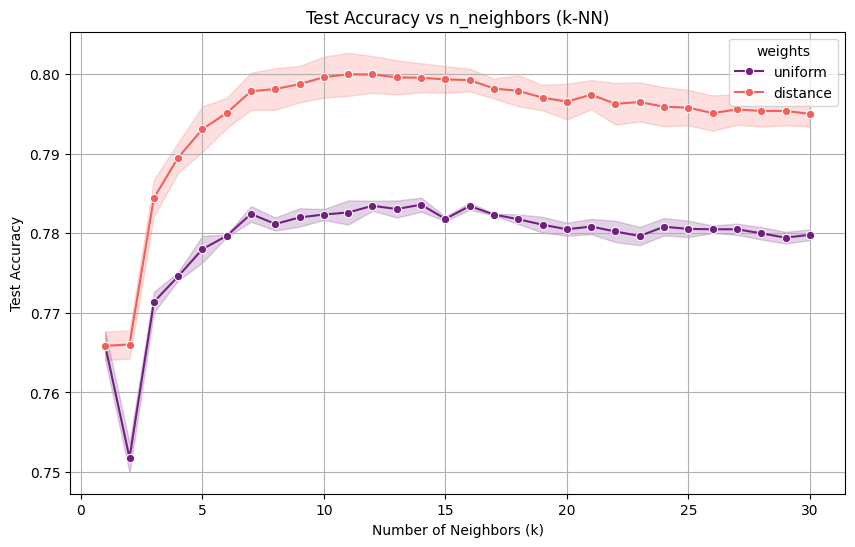

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_42834/2977537685.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='metric', y='Test Accuracy', palette='magma')


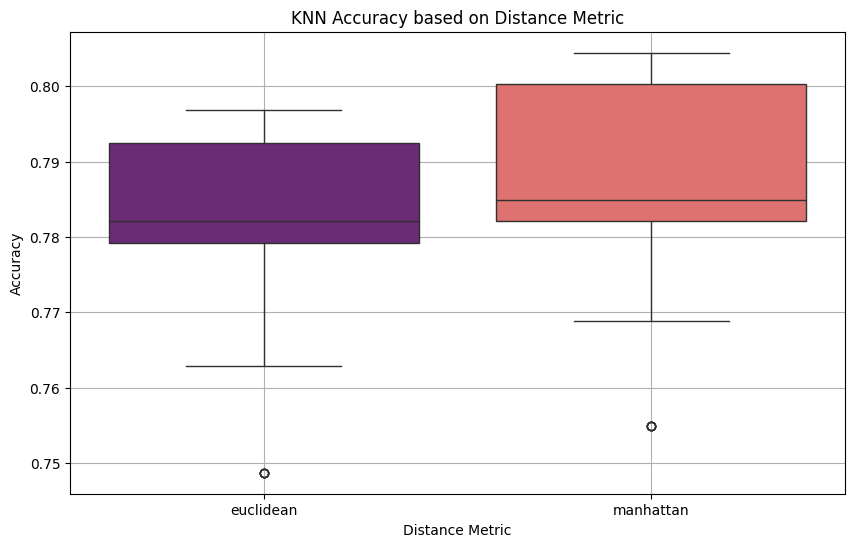

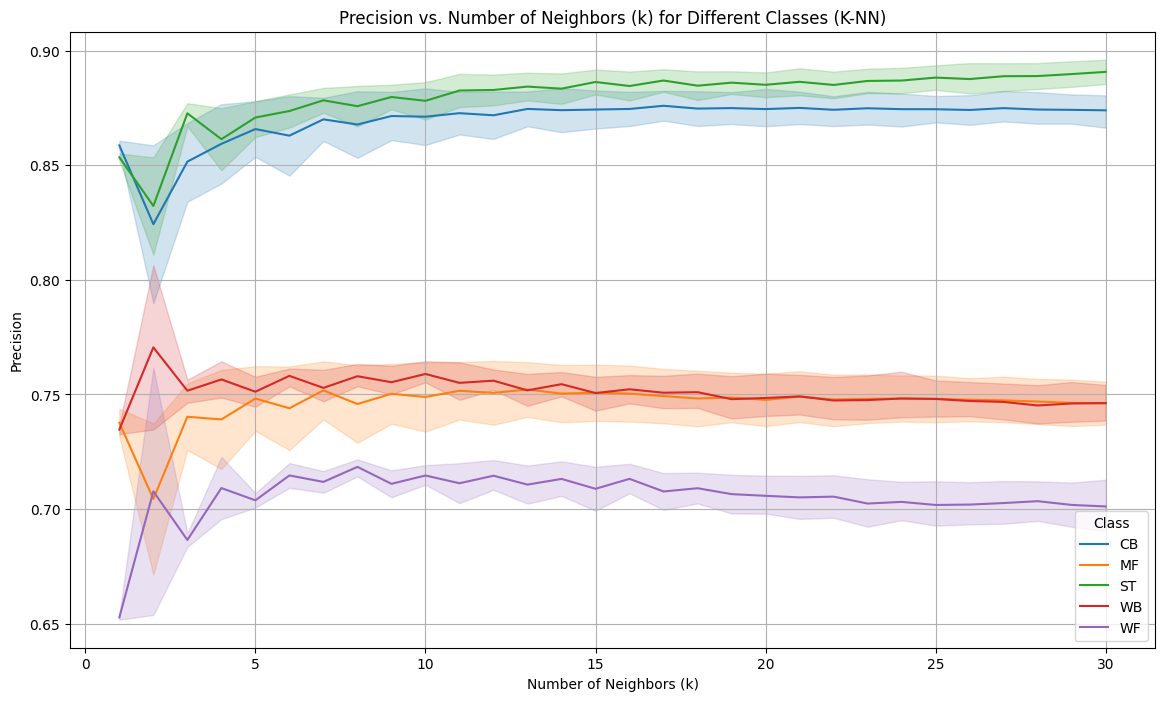

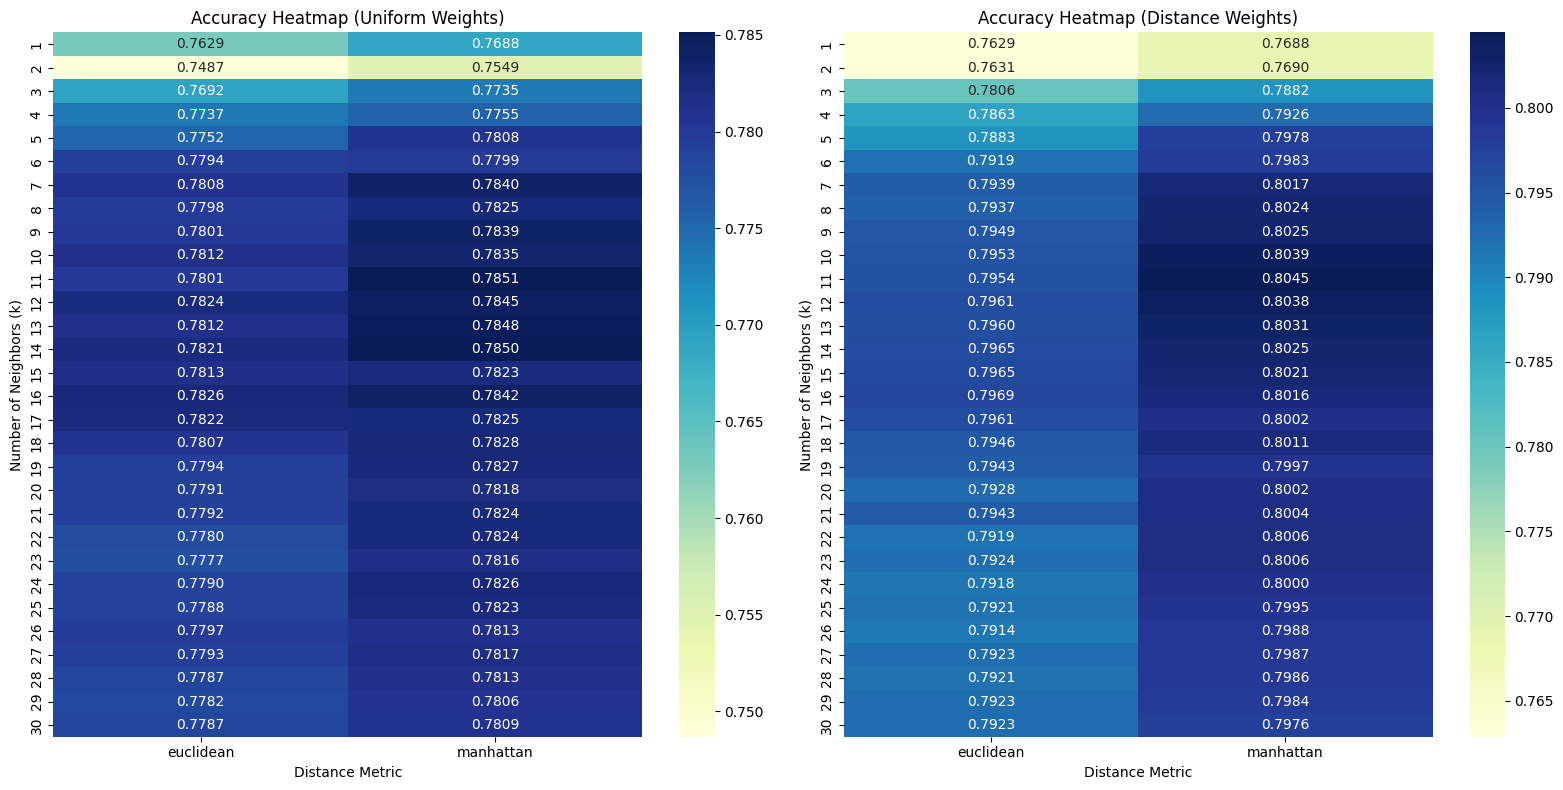

In [ ]:
# Interpret Results and make graphs

# Graphs and plots for KNN
df = pd.read_csv('classification_reports/knn_classification_report_all.csv')

# Test Accuracy vs n_neighbors
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='n_neighbors', y='Test Accuracy', hue='weights', marker='o', palette='magma')
plt.title('Test Accuracy vs n_neighbors (k-NN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='metric', y='Test Accuracy', palette='magma')
plt.title('KNN Accuracy based on Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

overall_accuracy_pivot = df.pivot_table(values='Test Accuracy', index='n_neighbors', columns='metric', aggfunc='mean')



classes = df['Class'].unique()
plt.figure(figsize=(14, 8))

for class_name in classes:
    subset = df[df['Class'] == class_name]
    sns.lineplot(data=subset, x='n_neighbors', y='Precision', label=class_name)

plt.title('Precision vs. Number of Neighbors (k) for Different Classes (K-NN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Precision')
plt.legend(title='Class')
plt.grid(True)
plt.show()



# Heatmap
df_uniform = df[df['weights'] == 'uniform']
df_distance = df[df['weights'] == 'distance']

uniform_accuracy_pivot = df_uniform.pivot_table(values='Test Accuracy', index='n_neighbors', columns='metric', aggfunc='mean')
distance_accuracy_pivot = df_distance.pivot_table(values='Test Accuracy', index='n_neighbors', columns='metric', aggfunc='mean')

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.heatmap(uniform_accuracy_pivot, annot=True, cmap="YlGnBu", fmt='.4f')
plt.title('Accuracy Heatmap (Uniform Weights)')
plt.xlabel('Distance Metric')
plt.ylabel('Number of Neighbors (k)')
plt.subplot(1, 2, 2)
sns.heatmap(distance_accuracy_pivot, annot=True, cmap="YlGnBu", fmt='.4f')
plt.title('Accuracy Heatmap (Distance Weights)')
plt.xlabel('Distance Metric')
plt.ylabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()



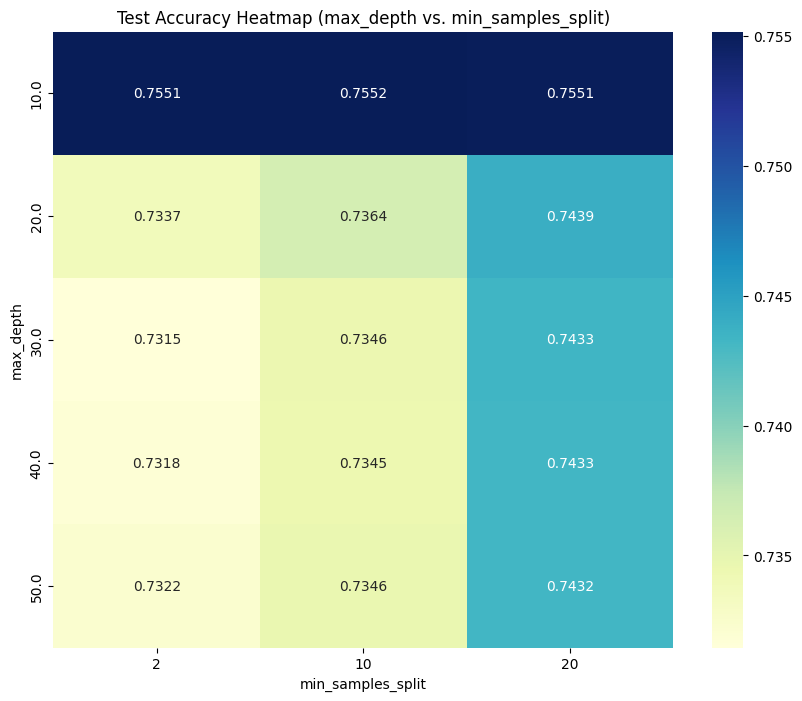

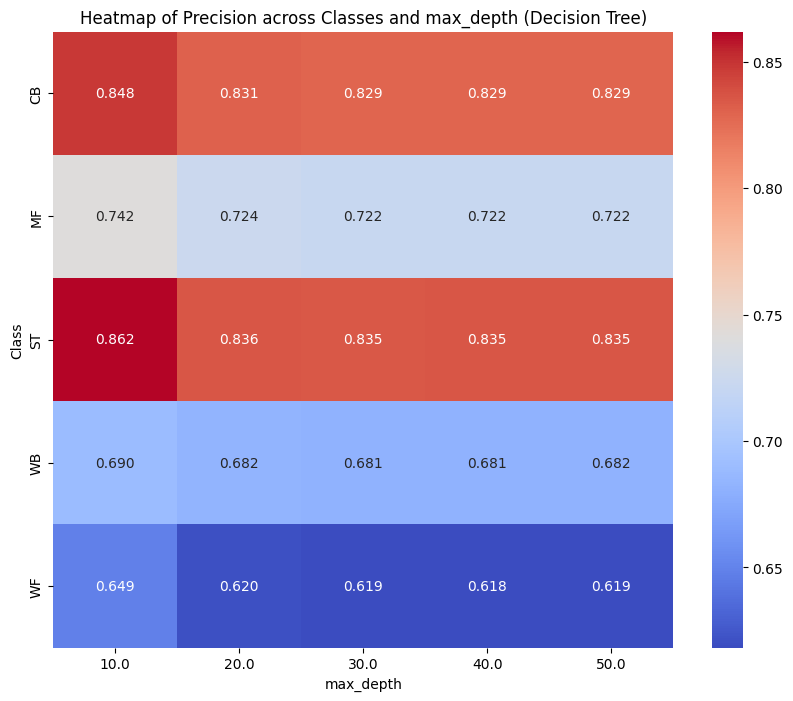

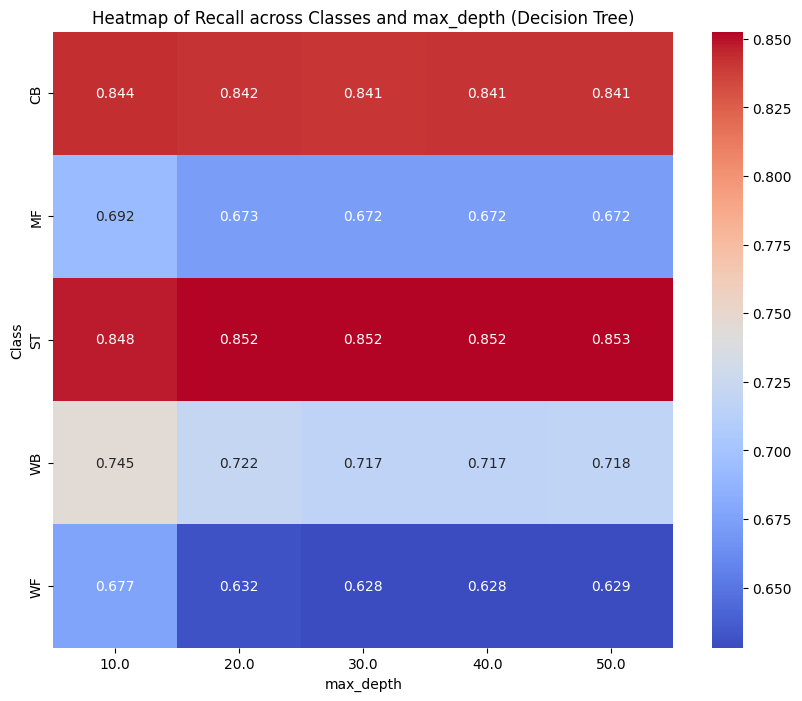

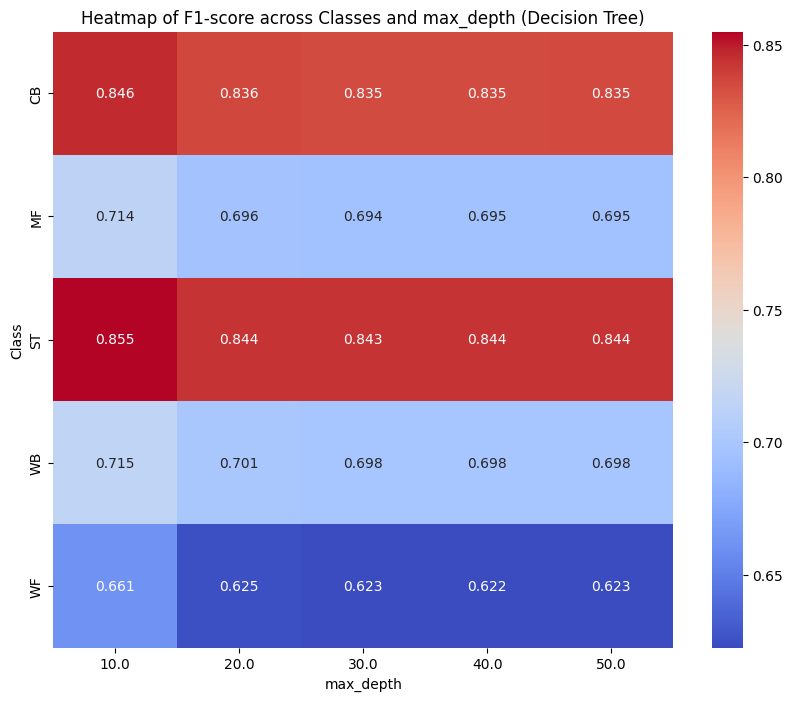

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_42834/1339504501.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='criterion', y='Test Accuracy', palette='Set2')


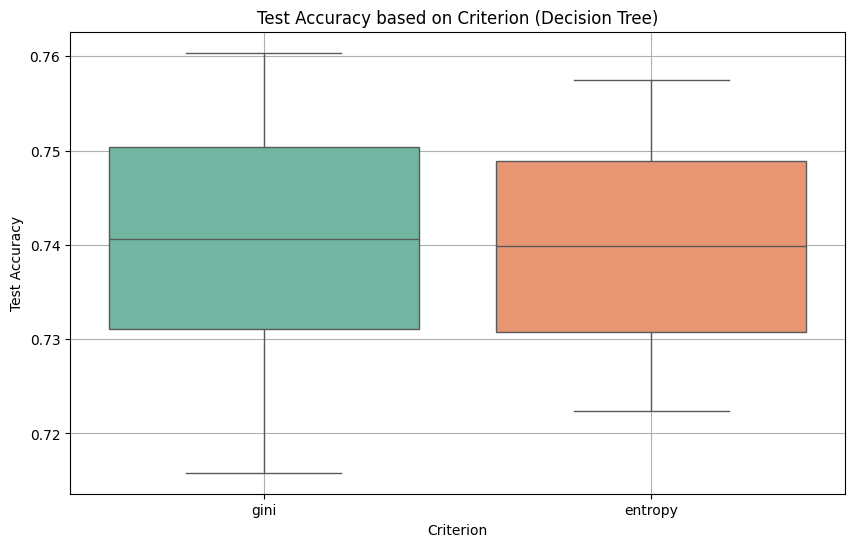

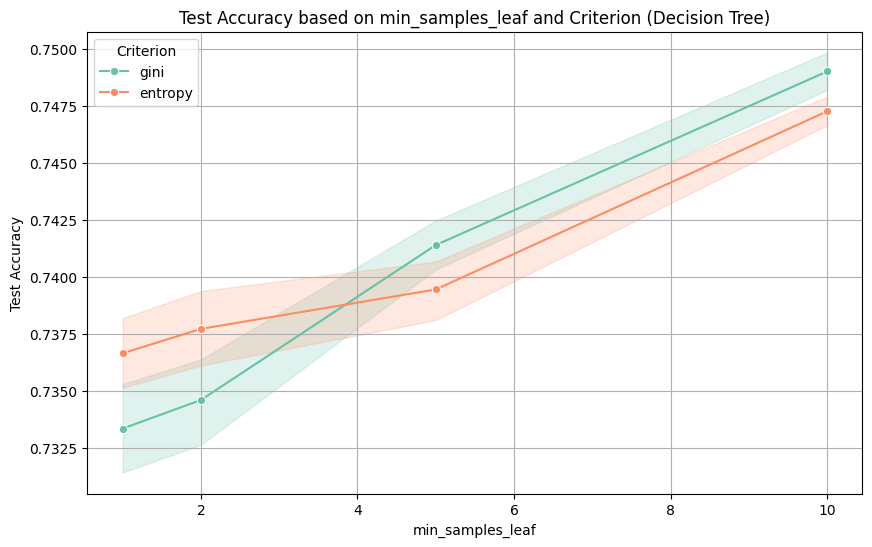

In [ ]:
# Graphs and plots for Decision Trees

df = pd.read_csv('classification_reports/decision_tree_classification_report_all.csv')

df['max_depth'] = pd.to_numeric(df['max_depth'], errors='coerce')  # Some rows might be missing values
df['min_samples_split'] = df['min_samples_split'].astype(int)
df['min_samples_leaf'] = df['min_samples_leaf'].astype(int)

# Accuracy heatmap based on max_depth and min_samples_split
accuracy_pivot = df.pivot_table(values='Test Accuracy', index='max_depth', columns='min_samples_split', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_pivot, annot=True, cmap="YlGnBu", fmt='.4f')
plt.title('Test Accuracy Heatmap (max_depth vs. min_samples_split)')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.show()


# Precision heatmap for each class across max_depth
for metric in ['Precision', 'Recall', 'F1-score']:
    pivot_df = df.pivot_table(values=metric, index='Class', columns='max_depth')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt='.3f')
    plt.title(f'Heatmap of {metric} across Classes and max_depth (Decision Tree)')
    plt.xlabel('max_depth')
    plt.ylabel('Class')
    plt.show()


# Boxplot of Test Accuracy based on criterion
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='criterion', y='Test Accuracy', palette='Set2')
plt.title('Test Accuracy based on Criterion (Decision Tree)')
plt.xlabel('Criterion')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


# Line plot for Test Accuracy by min_samples_leaf and criterion
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='min_samples_leaf', y='Test Accuracy', hue='criterion', marker='o', palette='Set2')
plt.title('Test Accuracy based on min_samples_leaf and Criterion (Decision Tree)')
plt.xlabel('min_samples_leaf')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.legend(title='Criterion')
plt.show()


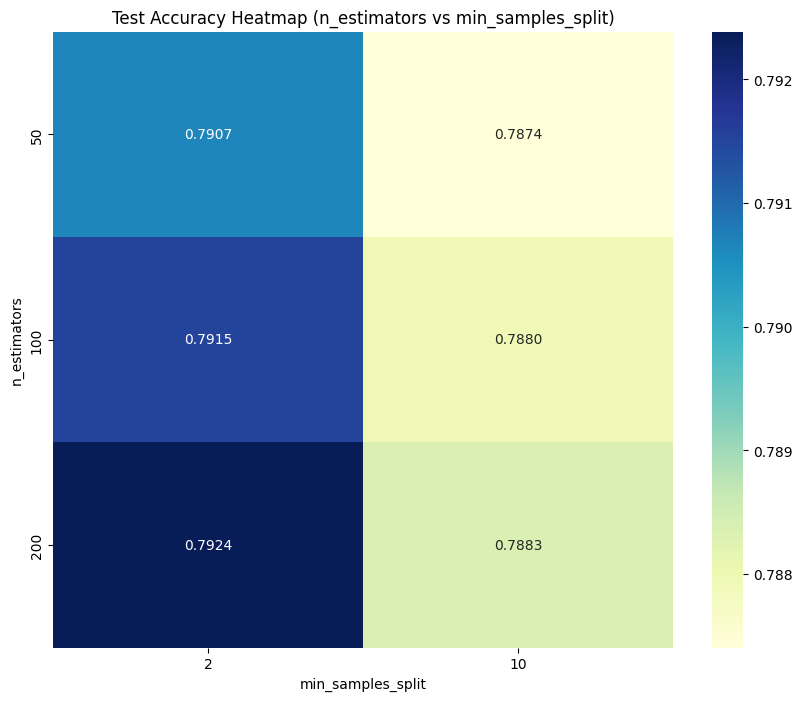

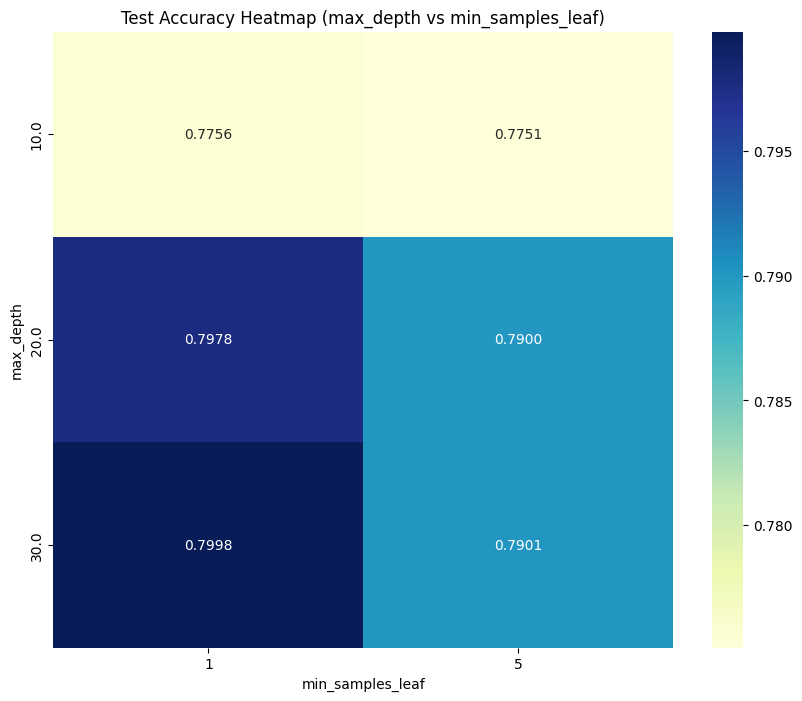

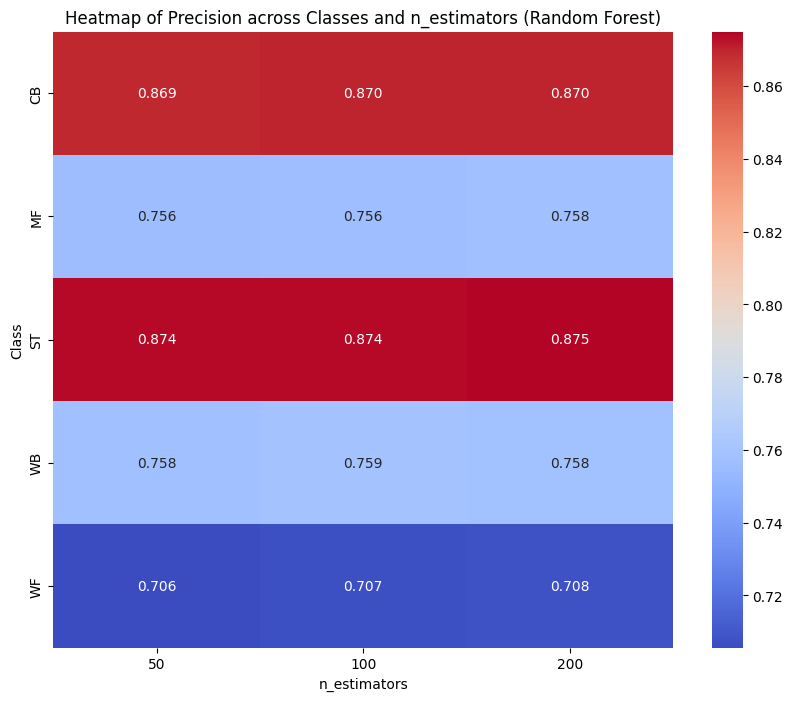

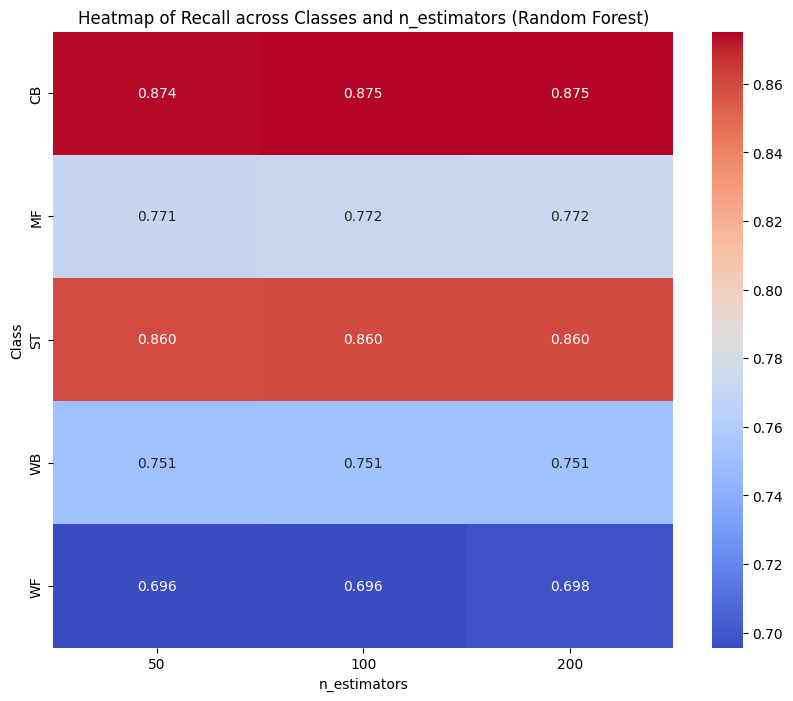

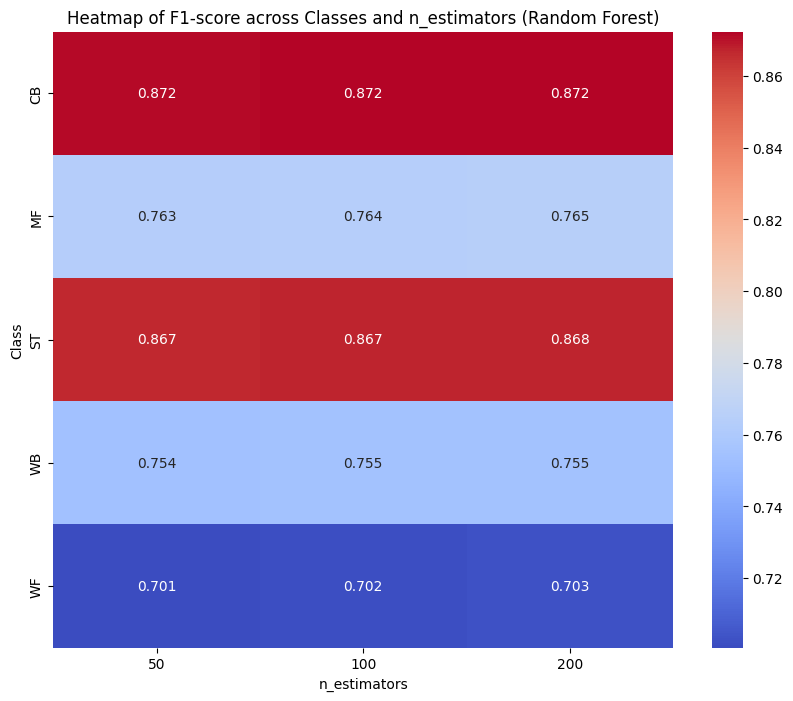

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_42834/1680740416.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='n_estimators', y='Test Accuracy', palette='Set2')


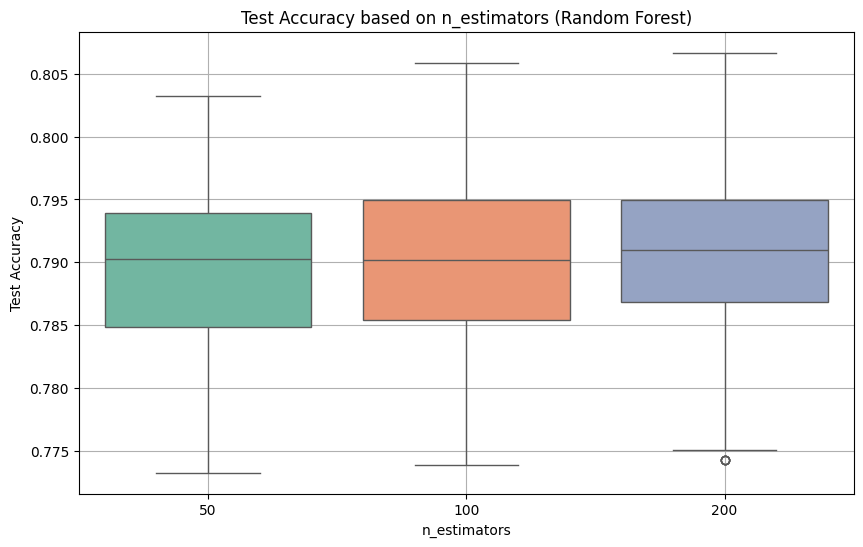

In [ ]:
# Graphs and plots for Random Forrest

df = pd.read_csv('classification_reports/rf_classification_report_all.csv')

df['n_estimators'] = df['n_estimators'].astype(int)
df['min_samples_split'] = df['min_samples_split'].astype(int)
df['min_samples_leaf'] = df['min_samples_leaf'].astype(int)
df['Test Accuracy'] = df['Test Accuracy'].astype(float)

# Heatmap of Test Accuracy based on n_estimators and min_samples_split
accuracy_pivot = df.pivot_table(values='Test Accuracy', index='n_estimators', columns='min_samples_split', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_pivot, annot=True, cmap="YlGnBu", fmt='.4f')
plt.title('Test Accuracy Heatmap (n_estimators vs min_samples_split)')
plt.xlabel('min_samples_split')
plt.ylabel('n_estimators')
plt.show()

# Heatmap of Test Accuracy based on max_depth and min_samples_leaf
accuracy_pivot = df.pivot_table(values='Test Accuracy', index='max_depth', columns='min_samples_leaf', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_pivot, annot=True, cmap="YlGnBu", fmt='.4f')
plt.title('Test Accuracy Heatmap (max_depth vs min_samples_leaf)')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.show()

# Precision, Recall, F1-Score heatmaps for different hyperparameters
for metric in ['Precision', 'Recall', 'F1-score']:
    pivot_df = df.pivot_table(values=metric, index='Class', columns='n_estimators')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt='.3f')
    plt.title(f'Heatmap of {metric} across Classes and n_estimators (Random Forest)')
    plt.xlabel('n_estimators')
    plt.ylabel('Class')
    plt.show()

# Boxplot for Test Accuracy by n_estimators
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='n_estimators', y='Test Accuracy', palette='Set2')
plt.title('Test Accuracy based on n_estimators (Random Forest)')
plt.xlabel('n_estimators')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()



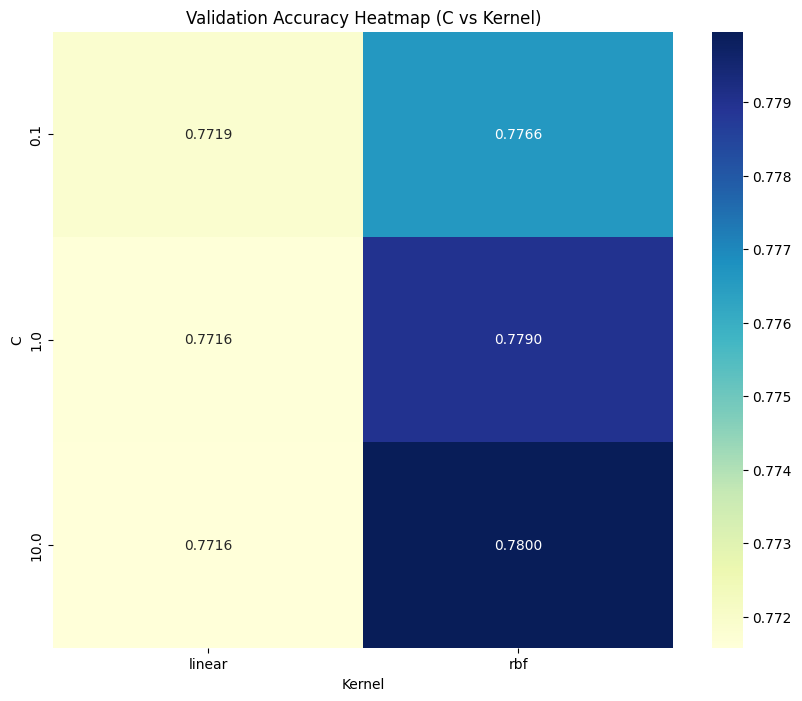

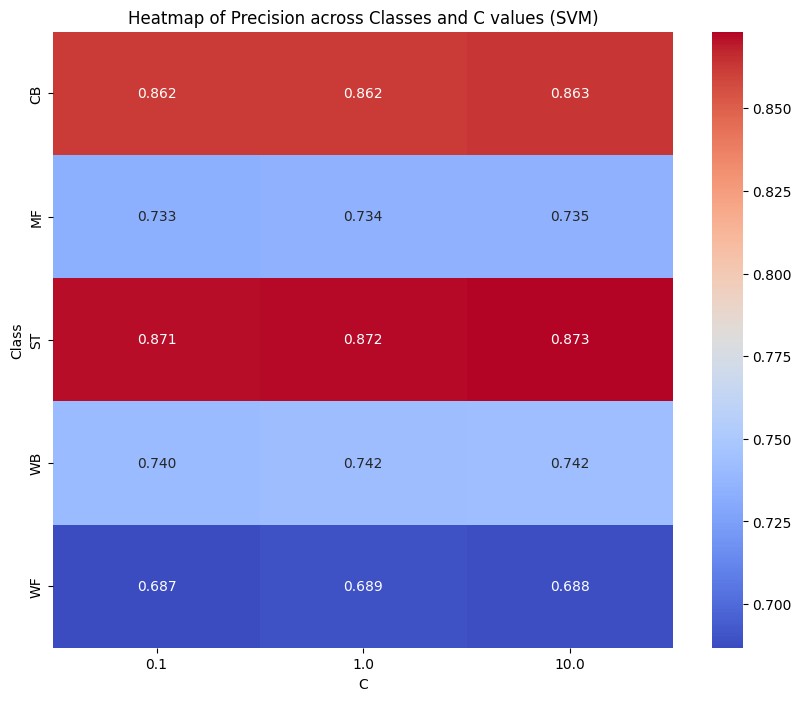

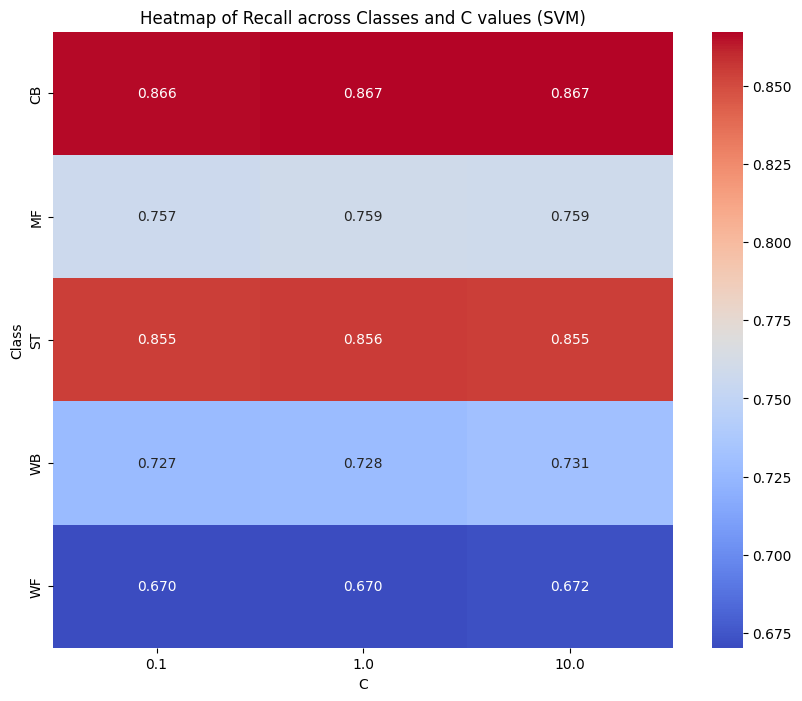

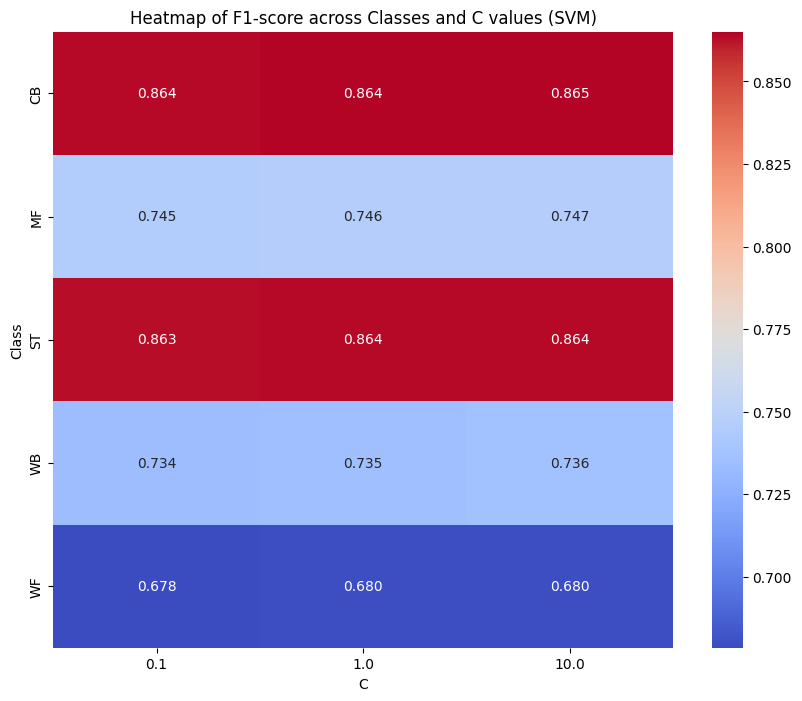

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_42834/714629611.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='C', y='Validation Accuracy', palette='Set2')


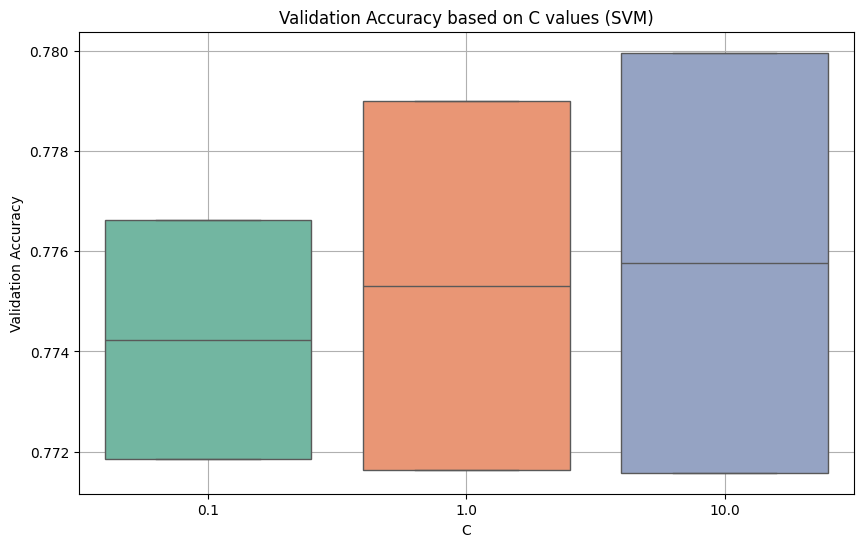

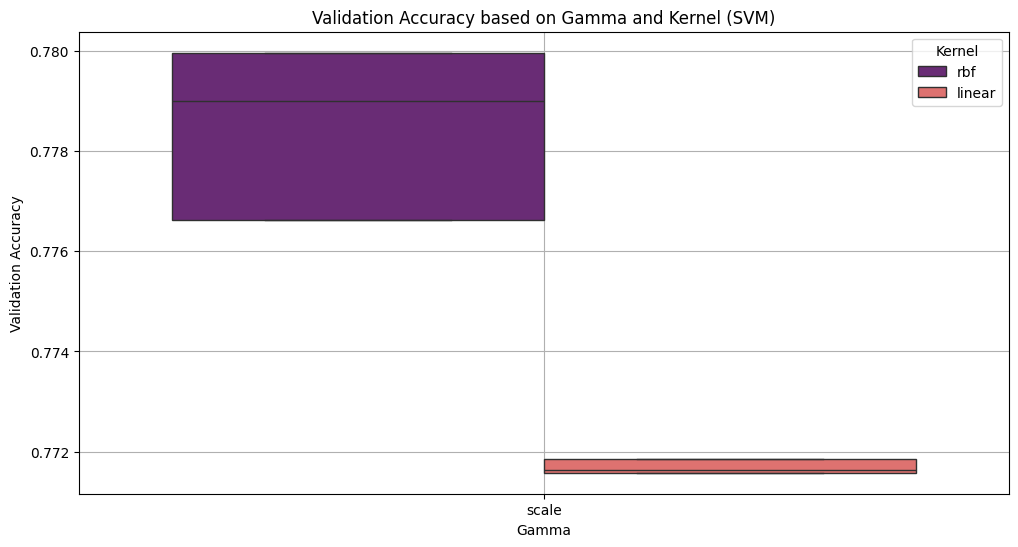

In [ ]:
# Graphs and plots for SVM


df = pd.read_csv('classification_reports/svm_classification_report_all.csv')

df['C'] = df['C'].astype(float)
df['Validation Accuracy'] = df['Validation Accuracy'].astype(float)

# Heatmap of Validation Accuracy for different C values
accuracy_pivot = df.pivot_table(values='Validation Accuracy', index='C', columns='kernel', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_pivot, annot=True, cmap="YlGnBu", fmt='.4f')
plt.title('Validation Accuracy Heatmap (C vs Kernel)')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.show()


# Precision heatmap for each class across different C values
for metric in ['Precision', 'Recall', 'F1-score']:
    pivot_df = df.pivot_table(values=metric, index='Class', columns='C')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt='.3f')
    plt.title(f'Heatmap of {metric} across Classes and C values (SVM)')
    plt.xlabel('C')
    plt.ylabel('Class')
    plt.show()



# Boxplot for Validation Accuracy by C values
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='C', y='Validation Accuracy', palette='Set2')
plt.title('Validation Accuracy based on C values (SVM)')
plt.xlabel('C')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()



# Boxplot for Validation Accuracy by gamma and kernel
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gamma', y='Validation Accuracy', hue='kernel', palette='magma')
plt.title('Validation Accuracy based on Gamma and Kernel (SVM)')
plt.xlabel('Gamma')
plt.ylabel('Validation Accuracy')
plt.legend(title='Kernel', loc='best')
plt.grid(True)
plt.show()





/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_42834/3976446342.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=accuracy_summary, x='var_smoothing', y='Test Accuracy', marker='o', palette='Set2')


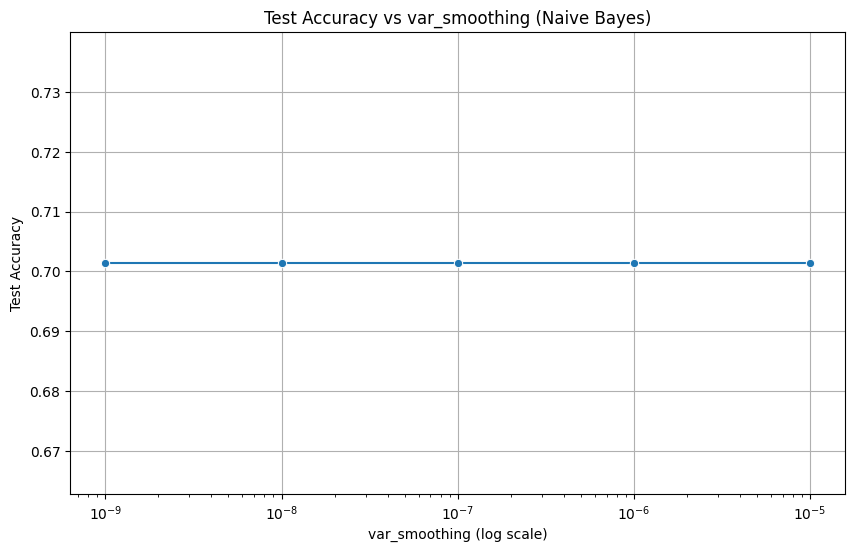

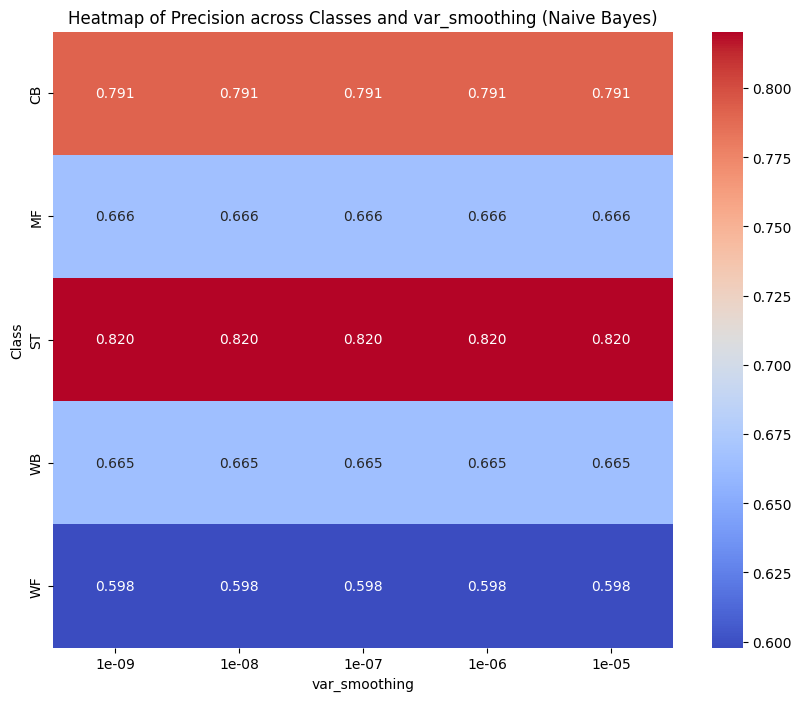

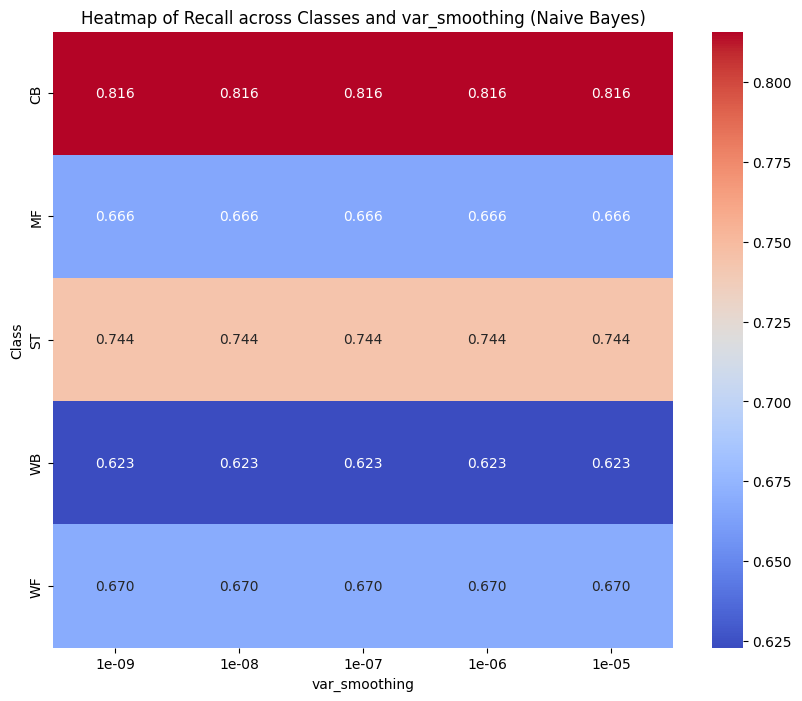

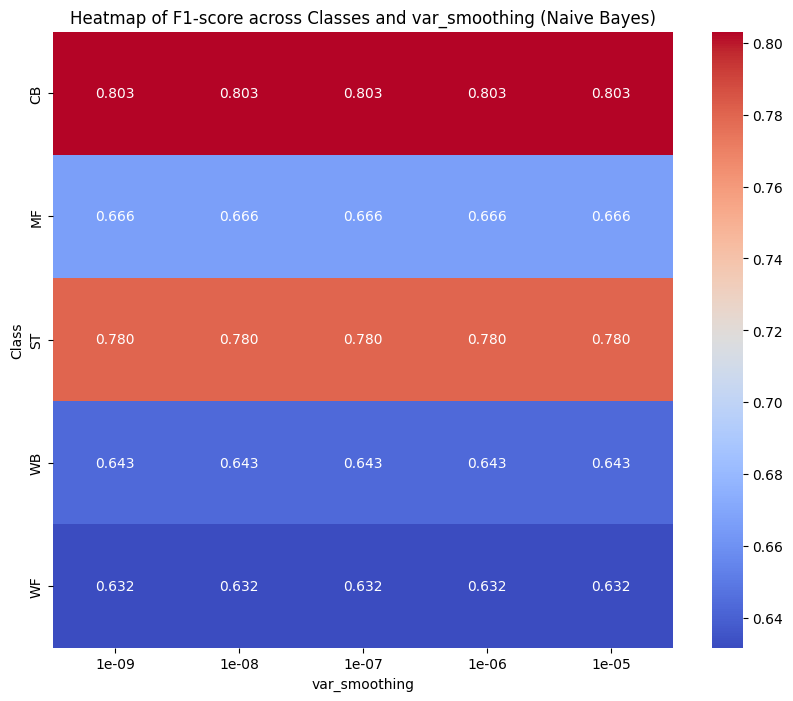

In [ ]:
# Graphs and plots for Naive Bayes
df = pd.read_csv('classification_reports/naive_bayes_classification_report_all.csv')

df['var_smoothing'] = df['var_smoothing'].astype(float)

accuracy_summary = df.groupby('var_smoothing')['Test Accuracy'].mean().reset_index()


# Plot Test Accuracy vs var_smoothing
plt.figure(figsize=(10, 6))
sns.lineplot(data=accuracy_summary, x='var_smoothing', y='Test Accuracy', marker='o', palette='Set2')
plt.title('Test Accuracy vs var_smoothing (Naive Bayes)')
plt.xscale('log')
plt.xlabel('var_smoothing (log scale)')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

# Prepare data for heatmaps (Pivoting the Data)
metrics = ['Precision', 'Recall', 'F1-score']

for metric in metrics:
    pivot_df = df.pivot_table(values=metric, index='Class', columns='var_smoothing')
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt='.3f')
    plt.title(f'Heatmap of {metric} across Classes and var_smoothing (Naive Bayes)')
    plt.xlabel('var_smoothing')
    plt.ylabel('Class')
    plt.show()

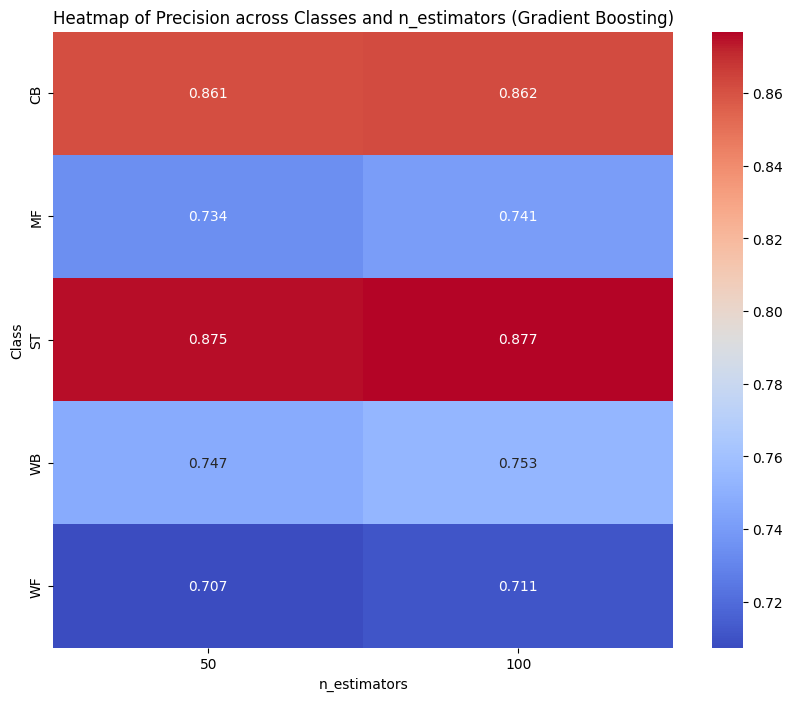

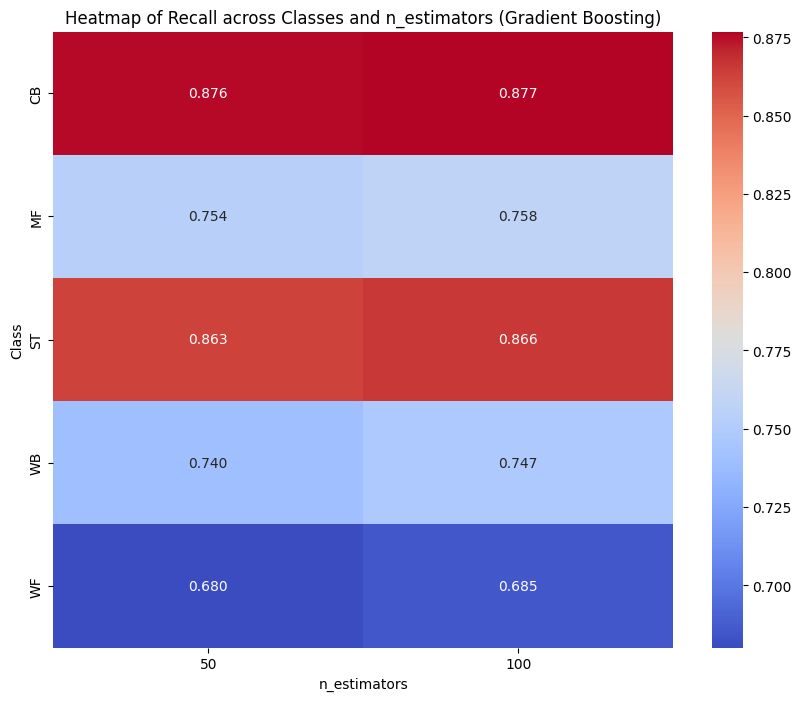

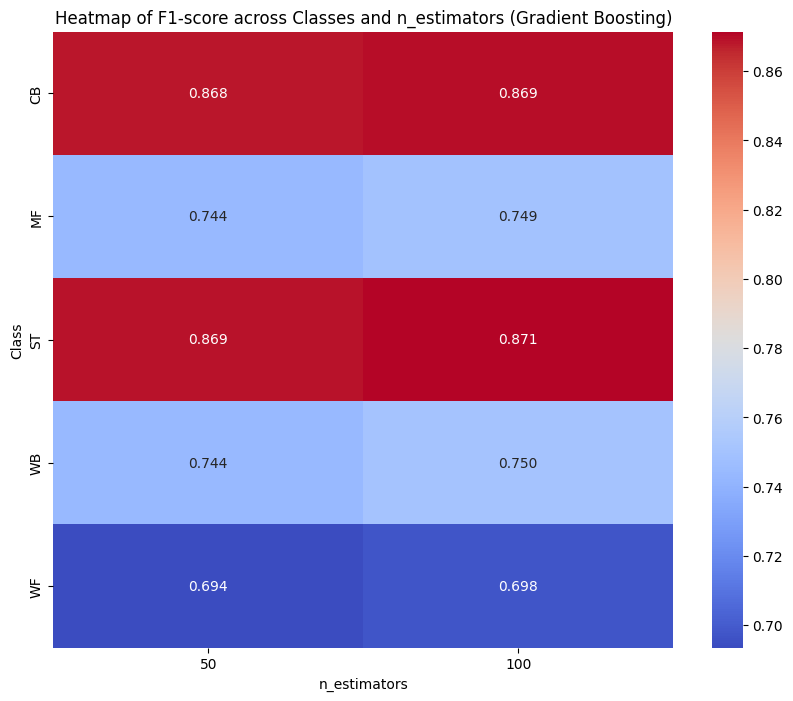

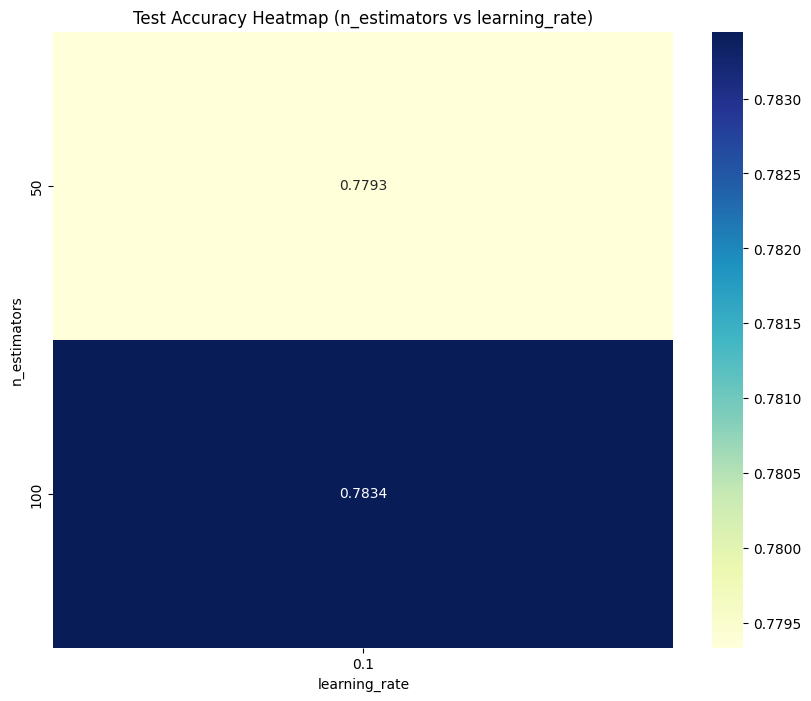

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_42834/3108607410.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='max_depth', y='Test Accuracy', palette='Set2')


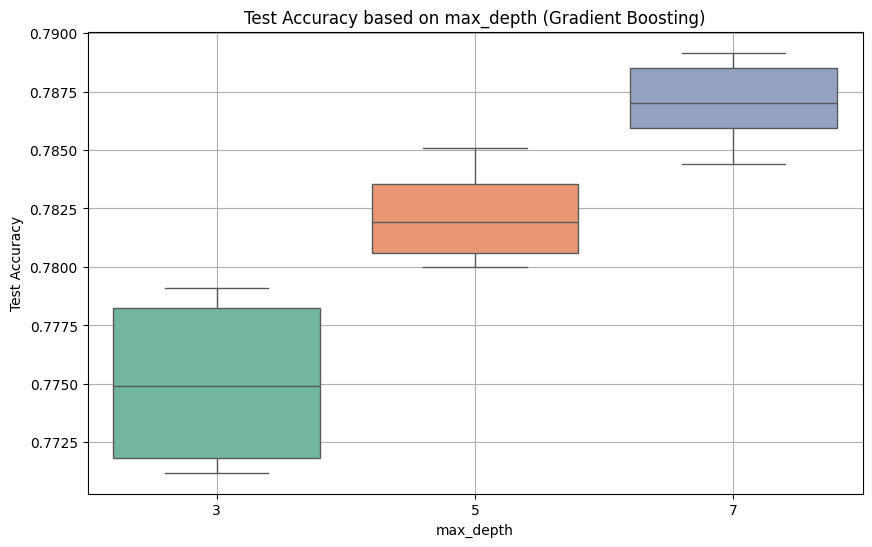

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_42834/3108607410.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='subsample', y='Test Accuracy', palette='Set2')


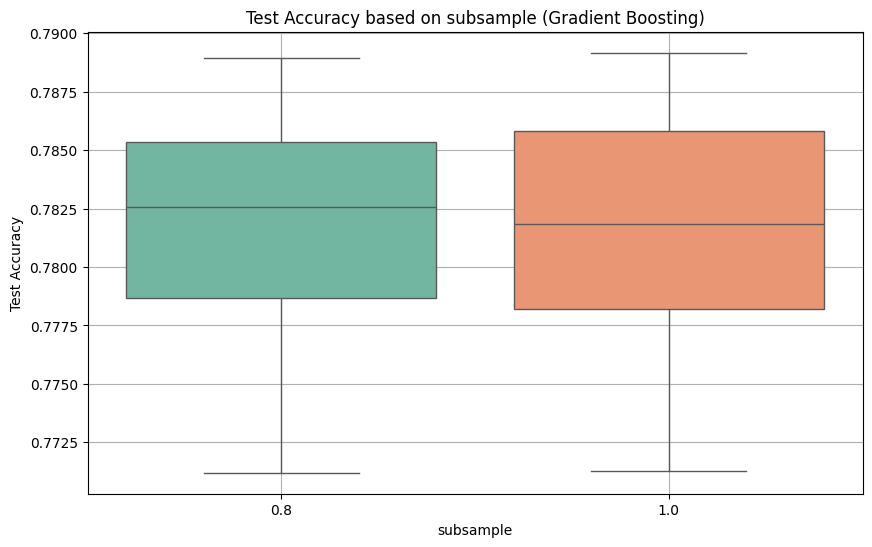

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_42834/3108607410.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='min_samples_split', y='Test Accuracy', palette='Set2')


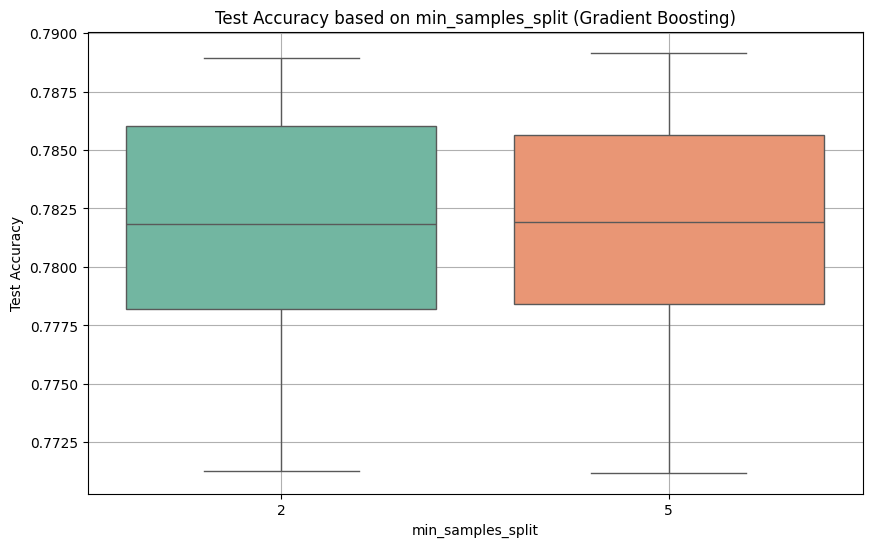

/var/folders/07/8ywdpq_s4fvb9b4cw7wwzvdm0000gn/T/ipykernel_42834/3108607410.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='min_samples_leaf', y='Test Accuracy', palette='Set2')


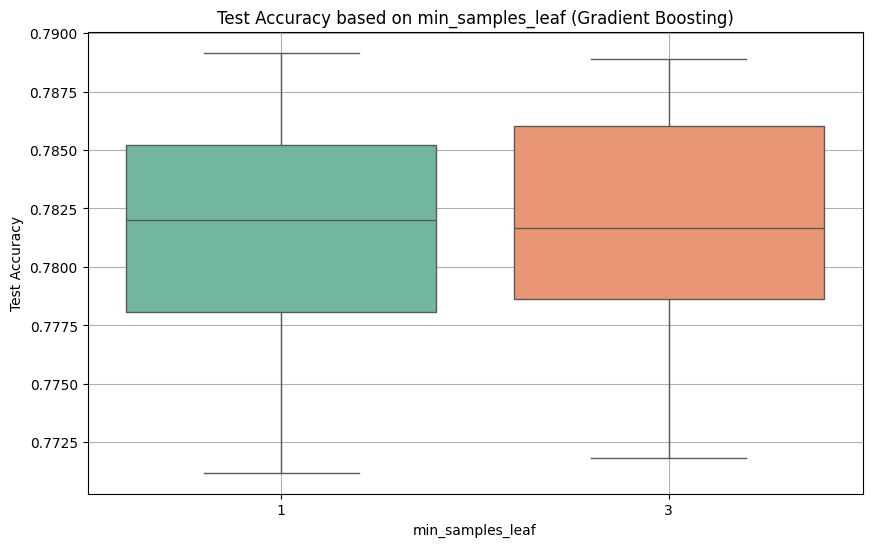

In [ ]:

# Gradient Boosting

df = pd.read_csv('classification_reports/gb_classification_report_all.csv')

df['n_estimators'] = df['n_estimators'].astype(int)
df['learning_rate'] = df['learning_rate'].astype(float)
df['max_depth'] = df['max_depth'].astype(int)
df['subsample'] = df['subsample'].astype(float)
df['min_samples_split'] = df['min_samples_split'].astype(int)
df['min_samples_leaf'] = df['min_samples_leaf'].astype(int)
df['Test Accuracy'] = df['Test Accuracy'].astype(float)

accuracy_pivot = df.pivot_table(values='Test Accuracy', index='n_estimators', columns='learning_rate', aggfunc='mean')

# Precision, Recall, F1-score
for metric in ['Precision', 'Recall', 'F1-score']:
    pivot_df = df.pivot_table(values=metric, index='Class', columns='n_estimators')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt='.3f')
    plt.title(f'Heatmap of {metric} across Classes and n_estimators (Gradient Boosting)')
    plt.xlabel('n_estimators')
    plt.ylabel('Class')
    plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_pivot, annot=True, cmap="YlGnBu", fmt='.4f')
plt.title('Test Accuracy Heatmap (n_estimators vs learning_rate)')
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
plt.show()

# Boxplot for Test Accuracy by max_depth
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='max_depth', y='Test Accuracy', palette='Set2')
plt.title('Test Accuracy based on max_depth (Gradient Boosting)')
plt.xlabel('max_depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

# Boxplot for Test Accuracy by subsample
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='subsample', y='Test Accuracy', palette='Set2')
plt.title('Test Accuracy based on subsample (Gradient Boosting)')
plt.xlabel('subsample')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

# Boxplot for Test Accuracy by min_samples_split
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='min_samples_split', y='Test Accuracy', palette='Set2')
plt.title('Test Accuracy based on min_samples_split (Gradient Boosting)')
plt.xlabel('min_samples_split')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

# Boxplot for Test Accuracy by min_samples_leaf
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='min_samples_leaf', y='Test Accuracy', palette='Set2')
plt.title('Test Accuracy based on min_samples_leaf (Gradient Boosting)')
plt.xlabel('min_samples_leaf')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()
